# **Project Name**    -  BIKE SHARING DEMAND PREDICTION



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **NAME -**       ASHISH THAKUR



# **Project Summary -**

The aim of this project is to develop a machine learning solution to predict the demand for rental bikes in an urban environment. Rental bikes are becoming increasingly popular as a convenient mode of urban transportation, and ensuring an adequate supply of bikes at different times of the day is crucial for a seamless user experience.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



The main challenge is to accurately forecast the number of bikes required for each hour, taking into account factors such as time of day, day of the week, weather conditions, and possibly special events. This prediction will help bike rental services ensure that customers can easily access bikes without long waiting times.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler ,MinMaxScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge ,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.simplefilter(action='ignore')




### Dataset Loading

In [2]:
import os
os.chdir('C:\\Users\\ashis\\Downloads') 

In [3]:
pwd()

'C:\\Users\\ashis\\Downloads'

In [4]:
# Load Dataset
df=pd.read_csv("SeoulBikeData.csv",encoding='Latin-1')

### Dataset First View

In [5]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [6]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f"total no. of rows in our dataset are {df.shape[0]}")
print(f"total no. of columns in our dataset are {df.shape[1]}")

total no. of rows in our dataset are 8760
total no. of columns in our dataset are 14


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

# there are no duplicated values in our dataset

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# there are no missing values in our dataset

### What did you know about your dataset?

# in our dataset , there are 14 columns , out which one column is datetime column, 3 columns are categorical columns and rest are numeric columns , and there are no nan and duplicate values in our dataset

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description 

## Date: Represents the date of data recording.
## Rented Bike Count: Indicates the number of bikes rented or used.
## Hour: Shows the hour of the day when the data was recorded.
## Temperature(°C): Denotes the temperature in degrees Celsius.
## Humidity(%): Represents the relative humidity percentage.
## Wind speed (m/s): Shows the wind speed in meters per second.
## Visibility (10m): Indicates visibility in meters.
## Dew point temperature(°C): Represents the dew point temperature in degrees Celsius.
## Solar Radiation (MJ/m2): Denotes solar radiation measured in megajoules per square meter.
## Rainfall(mm): Indicates the amount of rainfall in millimeters.
## Snowfall (cm): Represents the amount of snowfall in centimeters.
## Seasons: Categorizes data into seasons (e.g., spring, summer, fall, winter).
## Holiday: Indicates whether the day is a holiday ('Yes' or 'No').
## Functioning Day: Indicates whether the bike rental service was operational ('Yes' or 'No').

### Check no . of Unique Values for each variable.

In [13]:
unq_df=pd.DataFrame(index=df.columns,columns=['total no of unique values'])

In [14]:
for j,i in enumerate(df.columns):
    unq_df.iloc[j,:]=df[i].nunique()

In [15]:
unq_df

total no of unique values
Date                                            365
Rented Bike Count                              2166
Hour                                             24
Temperature(°C)                                 546
Humidity(%)                                      90
Wind speed (m/s)                                 65
Visibility (10m)                               1789
Dew point temperature(°C)                       556
Solar Radiation (MJ/m2)                         345
Rainfall(mm)                                     61
Snowfall (cm)                                    51
Seasons                                           4
Holiday                                           2
Functioning Day                                   2

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [17]:
# changing the data type  of 'Date' column to Datetime column
df['Date']=pd.to_datetime(df.Date)

In [18]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [19]:
df['days']=df.Date.dt.day_name()

In [20]:
df['month']=df.Date.dt.month_name()

In [21]:
def tim_cat(a):
    if a>=0 and a<=6:
        return ('early morning[0-6]')
    elif a>6 and a<12:
        return('morning[6-12]')
    elif a>=12 and a<=16:
        return ('afternoon[12-16]')
    elif a>16  and  a<=21:
        return('evening[16-21]')
    else:
        return ('night[21-24]')
    

In [22]:
df['time_slot']=df.Hour.apply(tim_cat)

In [23]:
df.sample(20)[['Hour','time_slot']]

Hour           time_slot
7179     3  early morning[0-6]
6079     7       morning[6-12]
4929     9       morning[6-12]
2931     3  early morning[0-6]
6710    14    afternoon[12-16]
4718    14    afternoon[12-16]
1642    10       morning[6-12]
4872     0  early morning[0-6]
2074    10       morning[6-12]
3459     3  early morning[0-6]
7157     5  early morning[0-6]
1816    16    afternoon[12-16]
2966    14    afternoon[12-16]
7364    20      evening[16-21]
8657    17      evening[16-21]
122      2  early morning[0-6]
981     21      evening[16-21]
8450     2  early morning[0-6]
5256     0  early morning[0-6]
6672     0  early morning[0-6]

In [24]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day      days    month           time_slot  
0             Yes  Thursday  January  early morning[0-6]  
1             Yes  Thursday  January  early morning[0-6]  
2             Yes  Thursday  January  early morning[0-6]  
3             Yes  Thursday  January  early morning[0-6]  
4             Yes  Thursday  January  early morning[0-6]

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [25]:
# Chart - 1 visualization code
def box_plot(df):
    fig=plt.figure(figsize=(8,8))
    for i in df.describe().columns:
        ax=fig.gca()
        sns.boxplot(df[i])
        ax.set_title(f'bar plot for {i}')
        plt.show()


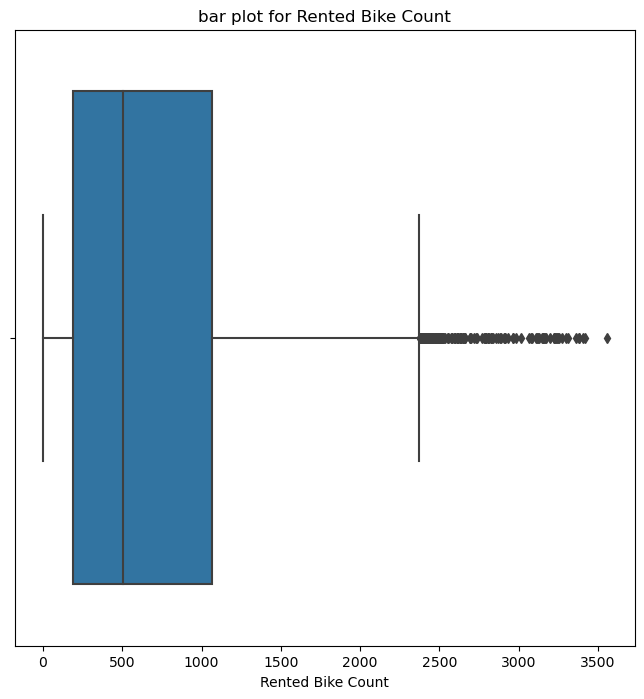

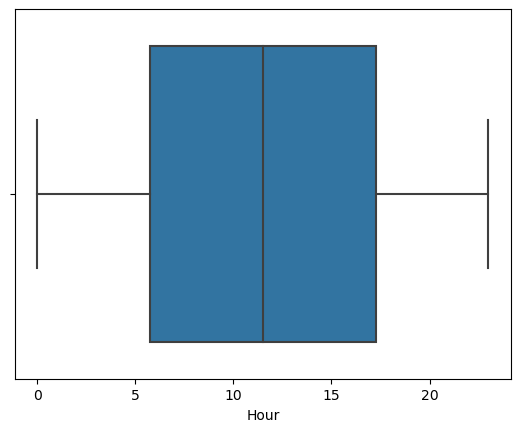

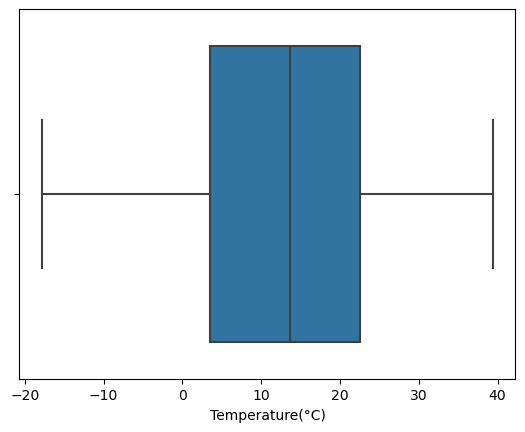

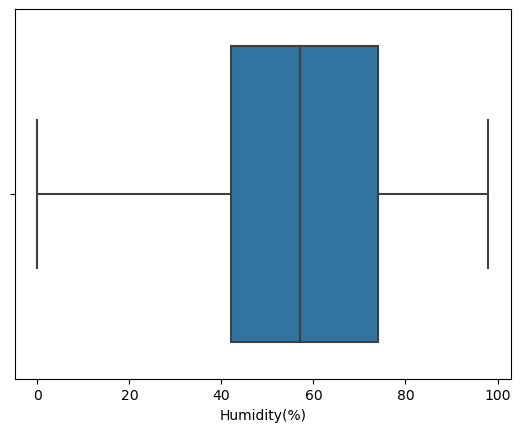

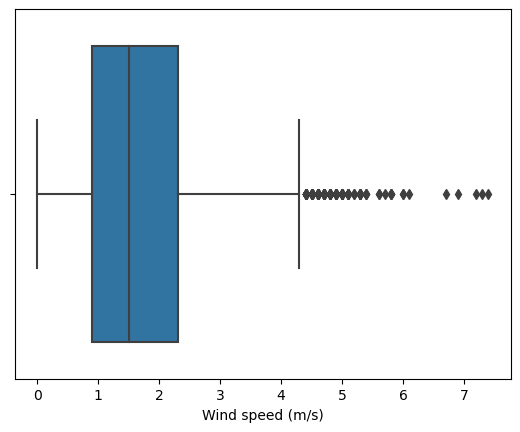

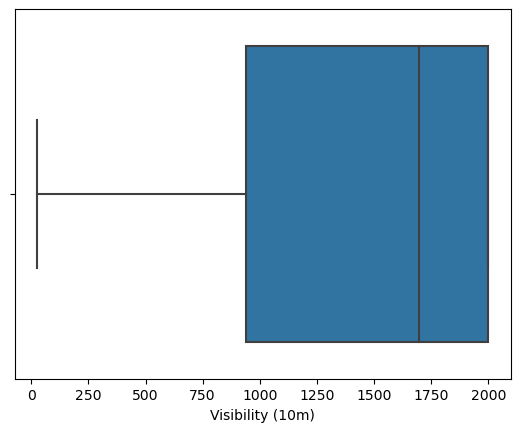

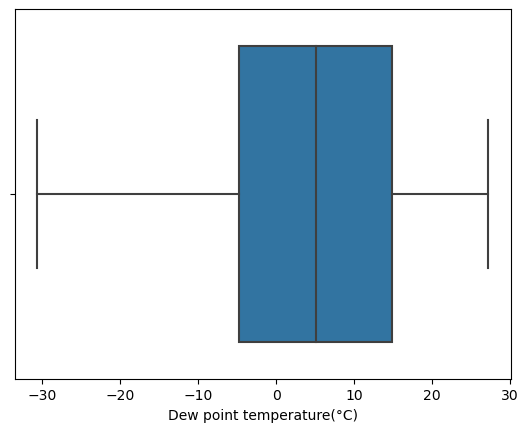

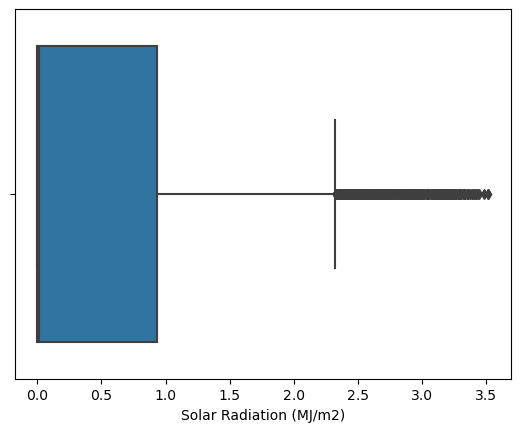

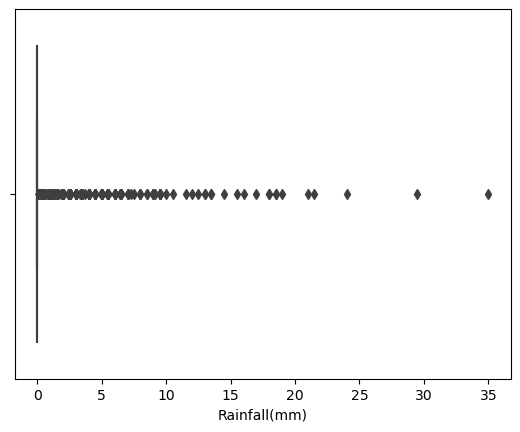

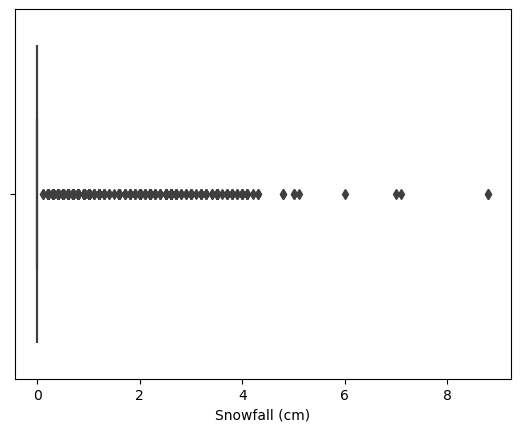

In [26]:
box_plot(df)

##### 1. Why did you pick the specific chart?

I pick this chart because , i want to check outliers in my dataset

##### 2. What is/are the insight(s) found from the chart?

I found that there are some columns in my dataset , which contain some outliers 

#### Chart - 2

In [27]:
def barplot_bikecount(a,b):
    fig=plt.figure(figsize=(12,8))
    dd=df.groupby(df[a],as_index=False)[b].mean().sort_values(b,ascending=False)
    ax=sns.barplot(x=dd[a],y=dd[b])
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()

In [28]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'days', 'month', 'time_slot'],
      dtype='object')

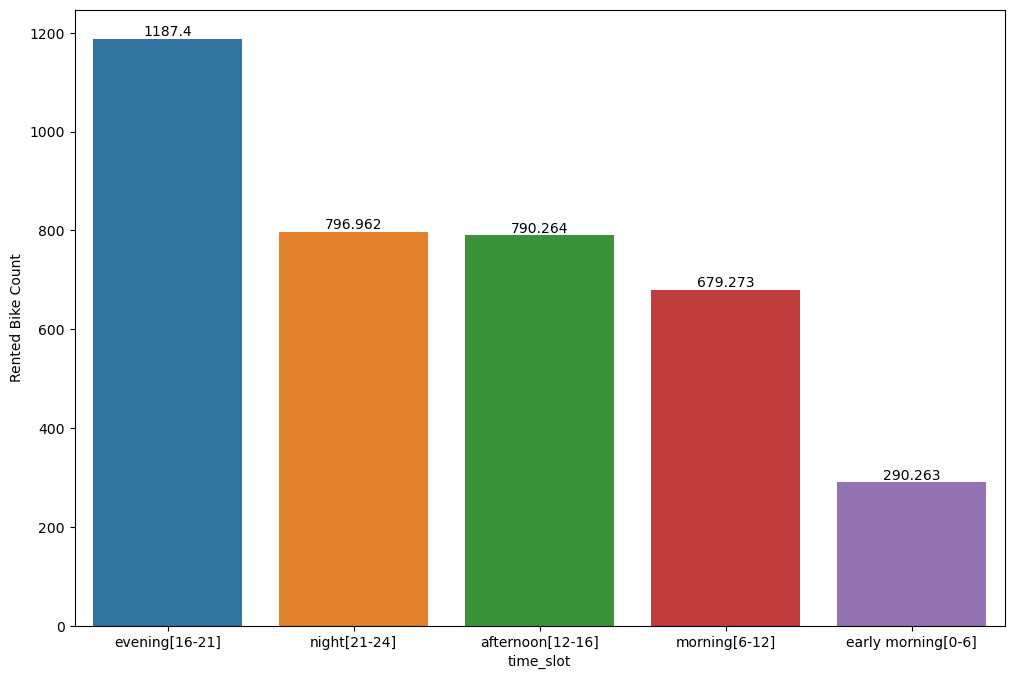

In [29]:
barplot_bikecount('time_slot','Rented Bike Count')

##### 1. Why did you pick the specific chart?

I pick this chart to see total no. of rented bikes  w.r.t different time slots of day.

##### 2. What is/are the insight(s) found from the chart?

Insights- bike rentals reach their zenith during the evening hours, while the early morning period experiences notably lower activity.

##### 3. Will the gained insights help creating a positive business impact? 
we need supply maximum supply of bikes in our store in the evening time and min in the earky morning time.

#### Chart - 3

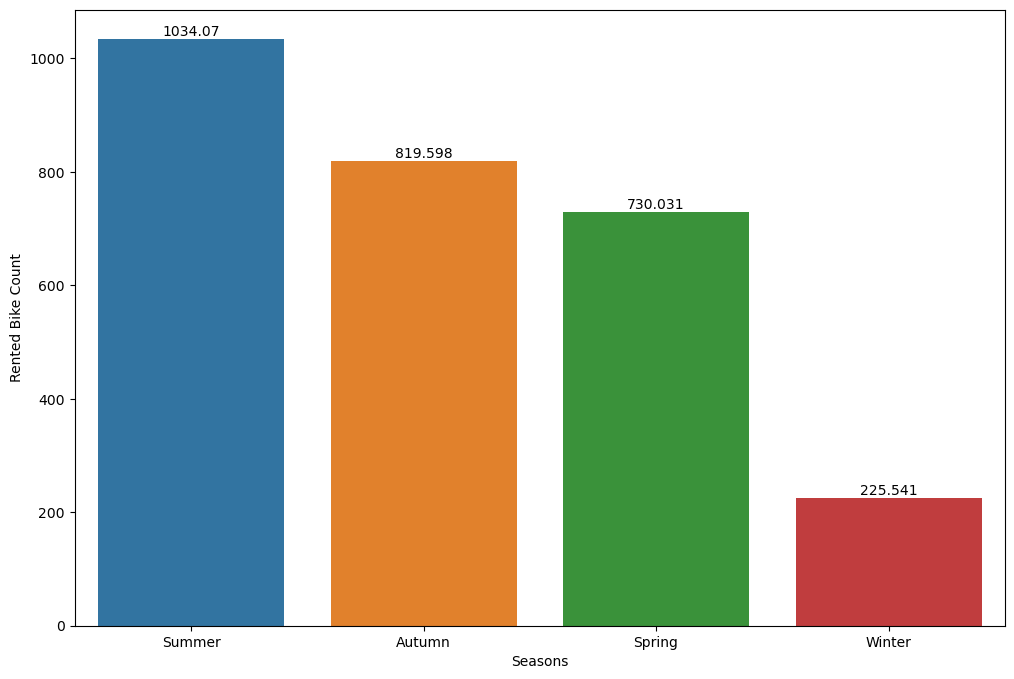

In [30]:
barplot_bikecount('Seasons','Rented Bike Count')

In [31]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'days', 'month', 'time_slot'],
      dtype='object')

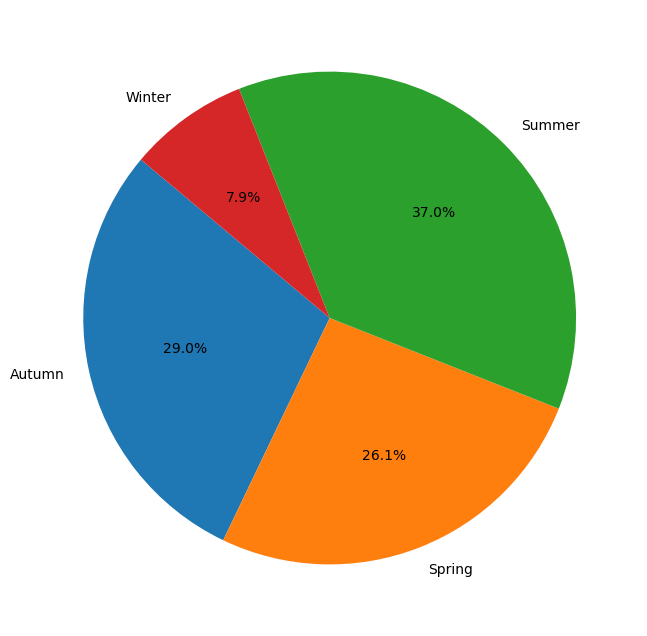

In [32]:
fig=plt.figure(figsize=(8,8))
ss=df.groupby(df['Seasons'],as_index=False)['Rented Bike Count'].sum()
plt.pie(ss['Rented Bike Count'],labels=ss['Seasons'],autopct='%1.1f%%',startangle=140)
plt.show()

##### 1. Why did you pick the specific chart?

I pick this chart to show the relationship between different seasons and total no. of rented bikes.

##### 2. What is/are the insight(s) found from the chart?

It is evident that the highest number of bike rentals occurs during the Summer season, followed by Autumn, Spring, and finally Winter, in descending order. This pattern suggests a strong seasonal influence on bike rental trends, with warmer months attracting significantly more riders than colder ones.


##### 3. Will the gained insights help creating a positive business impact? 
YES,By understanding the seasonal variations and the popularity of evening rentals, companies can strategically allocate resources, implement targeted marketing campaigns, and optimize services to harness the peak demand, primarily during the Summer season. However, it is crucial for businesses to remain vigilant of the challenges presented by the lower demand during the Winter season and not overlook the potential in early morning rentals.

#### Chart - 4

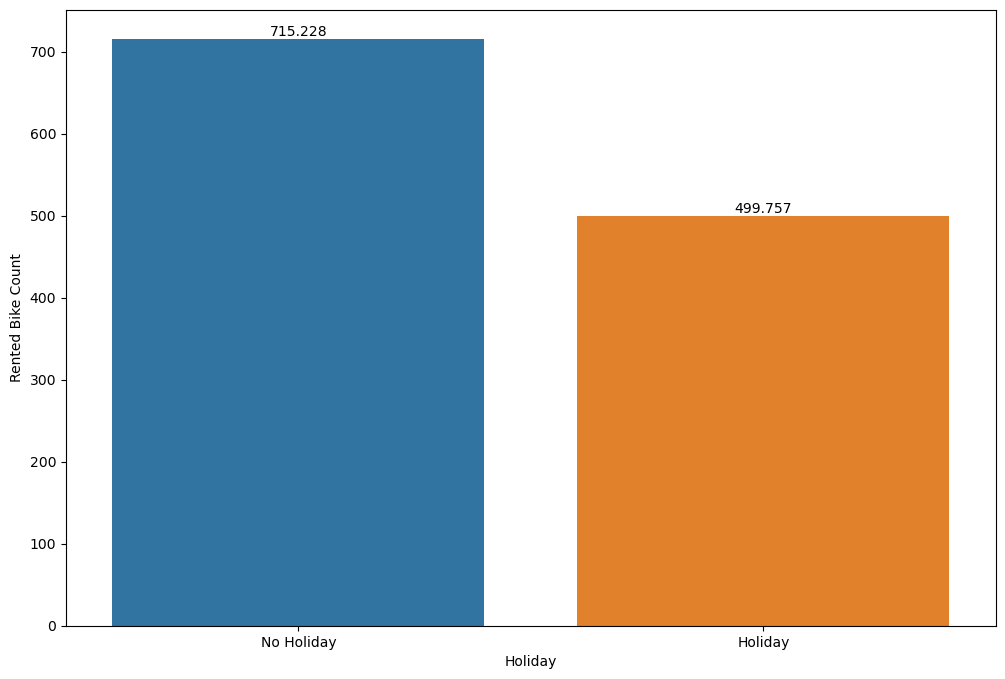

In [33]:
barplot_bikecount('Holiday','Rented Bike Count')

##### 1. Why did you pick the specific chart?

To see when bike get rented most , on holiday or no holiday

##### 2. What is/are the insight(s) found from the chart?

It is clear from bar graph that , when there is no holiday , then more bikes get rented 

##### 3. Will the gained insights help creating a positive business impact? 
YES, we need more no. bikes in our stores , when there is no holiday


#### Chart - 5

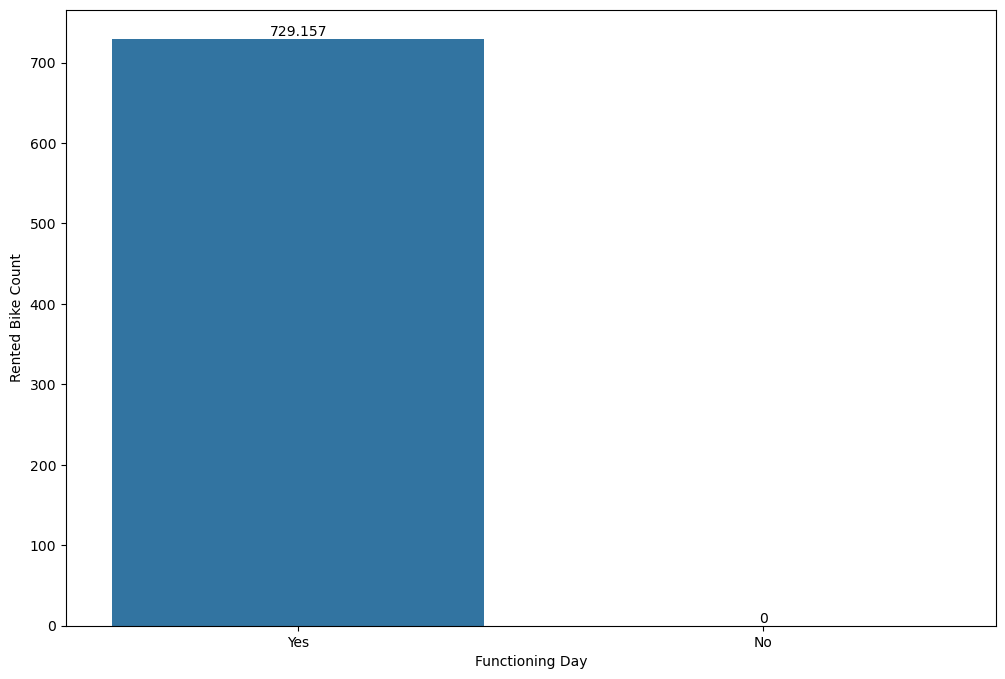

In [34]:
# Chart - 5 visualization code
barplot_bikecount('Functioning Day','Rented Bike Count')

##### 1. Why did you pick the specific chart?

i want to see the relationship between "functioning day column" and "rented bike" column

##### 2. What is/are the insight(s) found from the chart?

we dont need this column , because dataset is availble for only one value.

##### 3. Will the gained insights help creating a positive business impact? 
No

#### Chart - 6

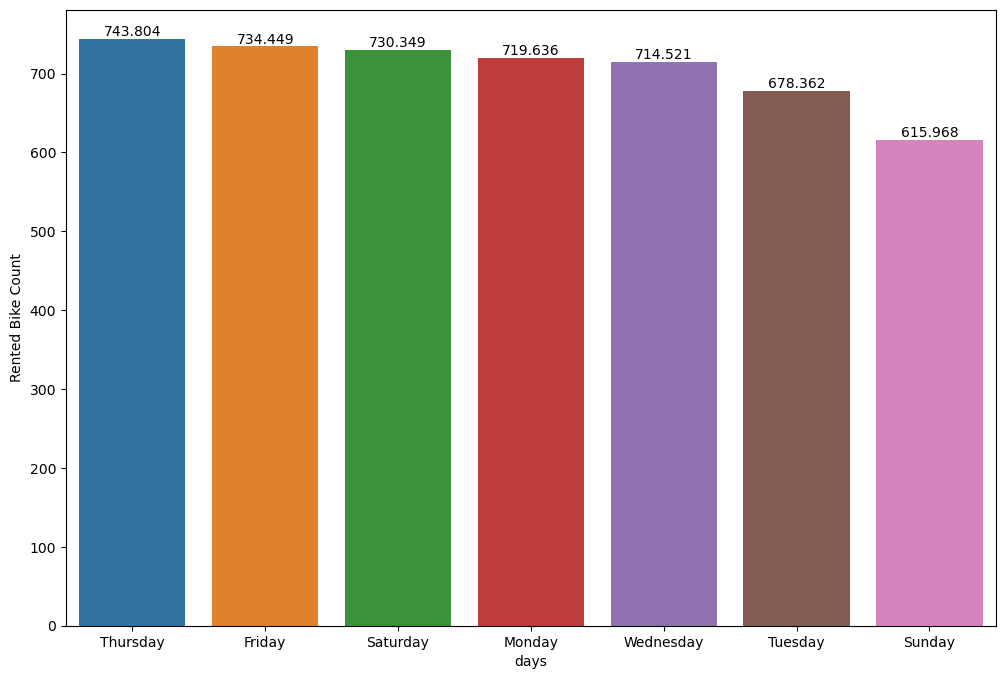

In [35]:
barplot_bikecount('days','Rented Bike Count')

##### 1. Why did you pick the specific chart?

I pick this to check the relation ship between total no. of bikes rented on different week days

##### 2. What is/are the insight(s) found from the chart?

Most bikes get rented on thursday and least on sunday.

##### 3. Will the gained insights help creating a positive business impact? 
YES, we can 

#### Chart - 7

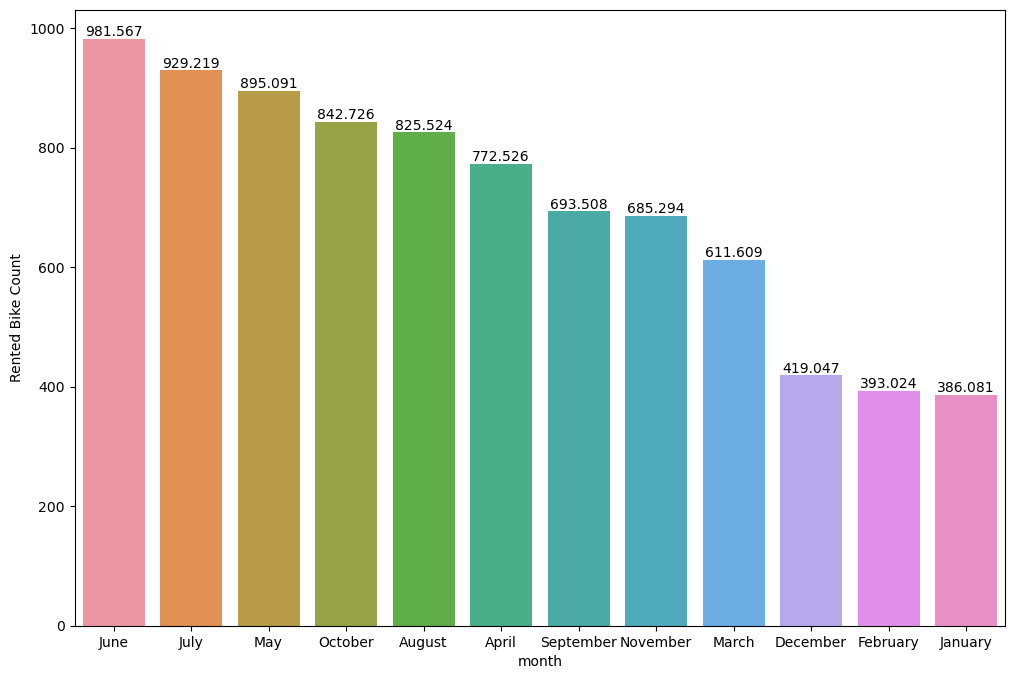

In [36]:
barplot_bikecount('month','Rented Bike Count')

##### 1. Why did you pick the specific chart?

To see the relationship between months and toatal no. of bikes rented

##### 2. What is/are the insight(s) found from the chart?

Its clear from the bar graph that most bikes get rented in the month "june" and least in the "january".

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 8

In [37]:
def scatter_plt(a,b):
    cor=df.corr()
    fig=plt.figure(figsize=(10,8))
    ax=sns.scatterplot(x=df[a],y=df[b],hue=df['Seasons'])
    ax.set_title(f"corr is {cor.loc[a,b]}")
    plt.show()

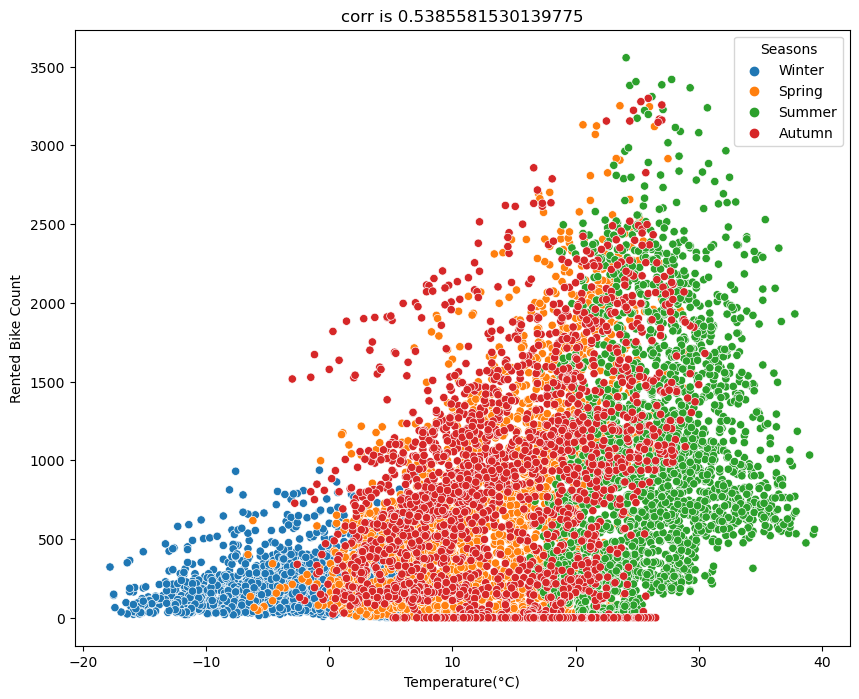

In [38]:
scatter_plt('Temperature(°C)','Rented Bike Count')

##### 1. Why did you pick the specific chart?

I picked this specific chart , because i want to see the impact of temperature on no. of bikes get rented.

##### 2. What is/are the insight(s) found from the chart?

It is very clear from the scatterplot , that as temperature increases more no. of bikes get rented .

##### 3. Will the gained insights help creating a positive business impact? 
Yes, summer season needs more no. of bikes in store  and less in winter season.

#### Chart - 9

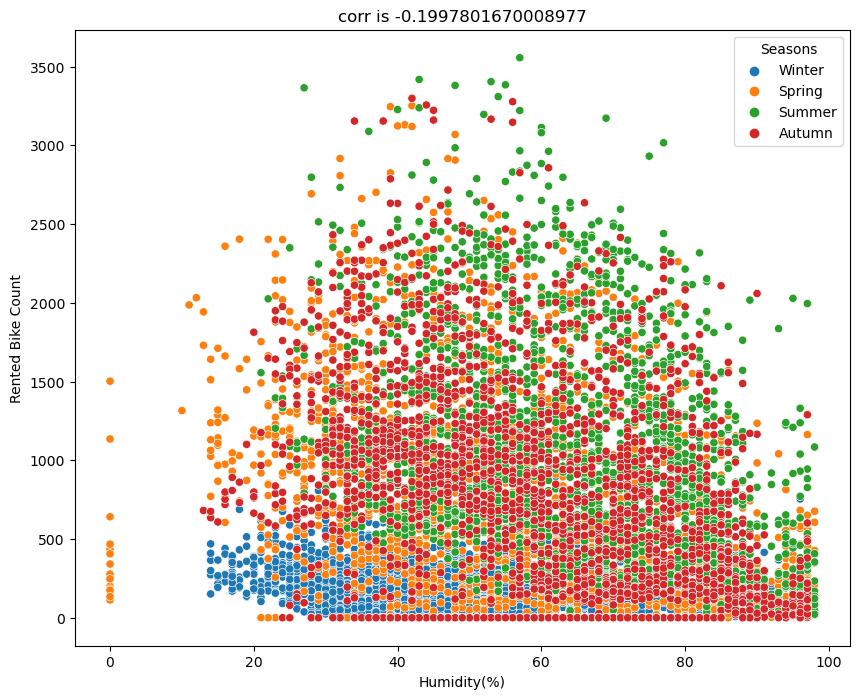

In [39]:
scatter_plt('Humidity(%)','Rented Bike Count')

##### 1. Why did you pick the specific chart?

I want to understand the relationship between humidity and no. of bikes get rented 

##### 2. What is/are the insight(s) found from the chart?

There is no visible impact of humidity in buisness

##### 3. Will the gained insights help creating a positive business impact? 
NO

#### Chart - 10

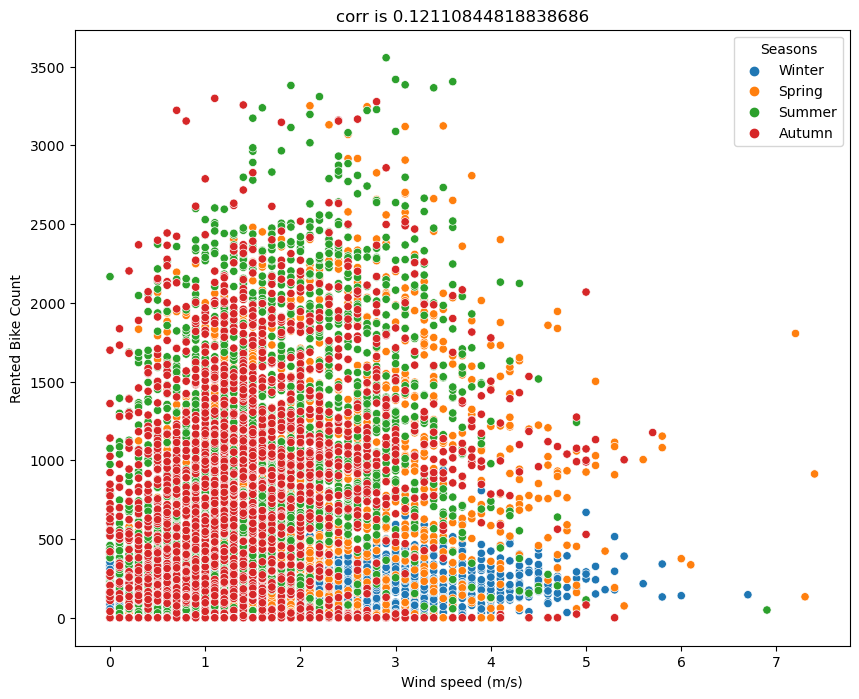

In [41]:
# Chart - 10 visualization code

scatter_plt('Wind speed (m/s)','Rented Bike Count')

##### 1. Why did you pick the specific chart?

To understand the impact of windspeed on buisness

##### 2. What is/are the insight(s) found from the chart?

when windspeed is less then more bikes get rented and one of the reason why less bikes get rented in winter is more windspeed, which can clearly seen from scatterplot

#### Chart - 11

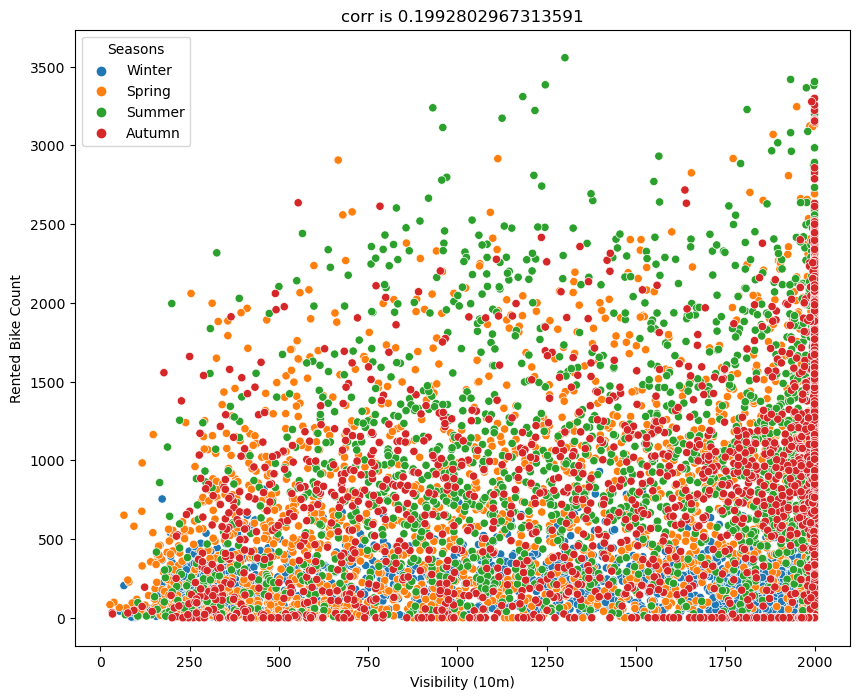

In [42]:
scatter_plt('Visibility (10m)','Rented Bike Count')

##### 1. Why did you pick the specific chart?

to understand the relation ship between visibilty and bike get rented

##### 2. What is/are the insight(s) found from the chart?

Visibilty has not much impact on  buisness

##### 3. Will the gained insights help creating a positive business impact? 
NO.

#### Chart - 12

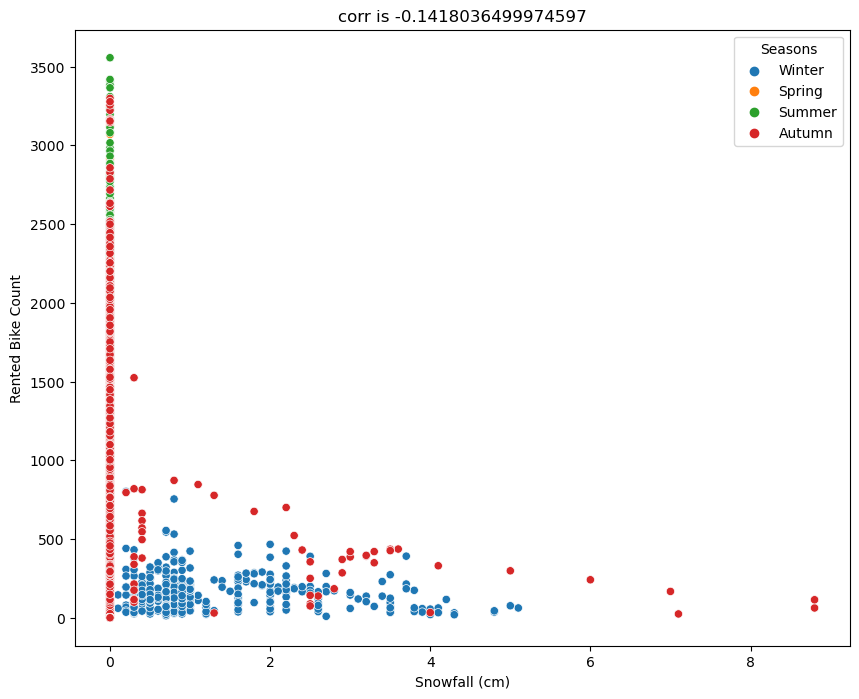

In [43]:
scatter_plt('Snowfall (cm)','Rented Bike Count')

##### 1. Why did you pick the specific chart?

to understand the relationship between  snowfall and rented bikse count.

##### 2. What is/are the insight(s) found from the chart?

it is clear from scatter plot that , buisness is at peak when there is no snow fall.

##### 3. Will the gained insights help creating a positive business impact? 
Yes

#### Chart - 13

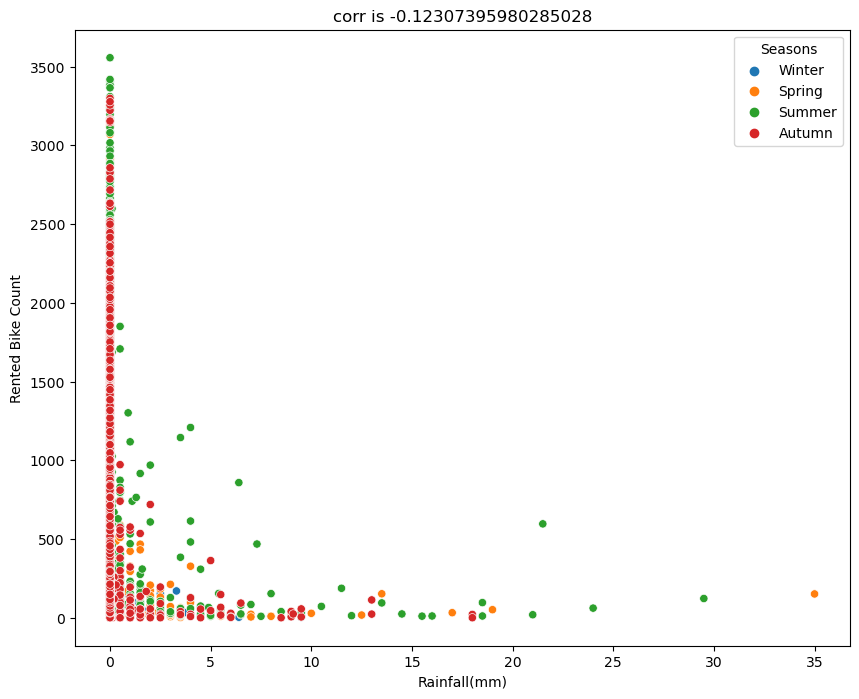

In [44]:
scatter_plt('Rainfall(mm)','Rented Bike Count')

##### 1. Why did you pick the specific chart?

to understand the relationship between  snowfall and rented bikse count.

##### 2. What is/are the insight(s) found from the chart?

it is clear from scatter plot that , buisness is at peak when there is no rainfall.

##### 3. Will the gained insights help creating a positive business impact? 


Answer Here

#### Chart - 14

In [45]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'days', 'month', 'time_slot'],
      dtype='object')

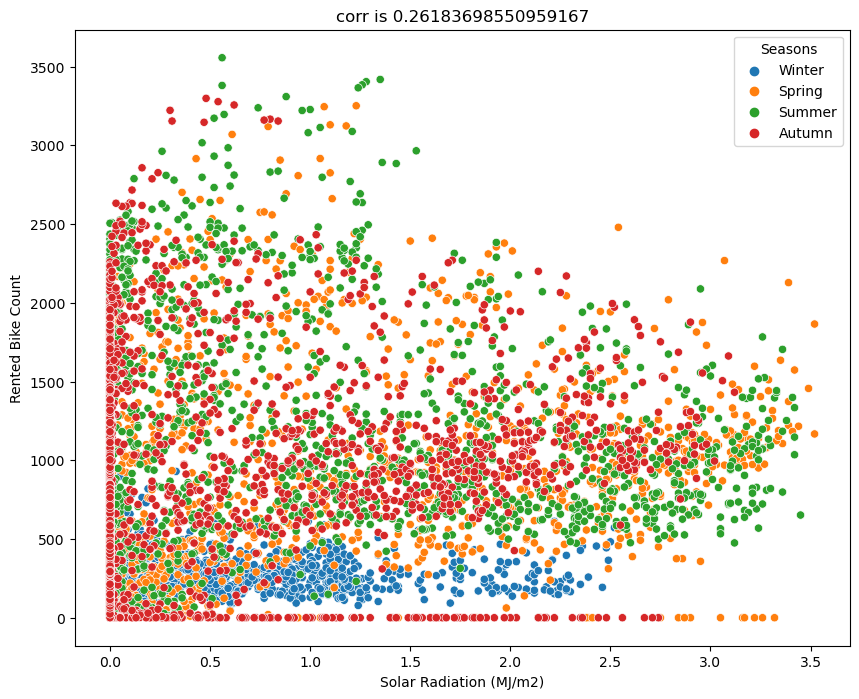

In [46]:
scatter_plt('Solar Radiation (MJ/m2)','Rented Bike Count')

#####  Why did you pick the specific chart?

To understand the relationship between solar radiation and rented bike count , we can see that  in summers as solar radiation 

#### Chart - 14

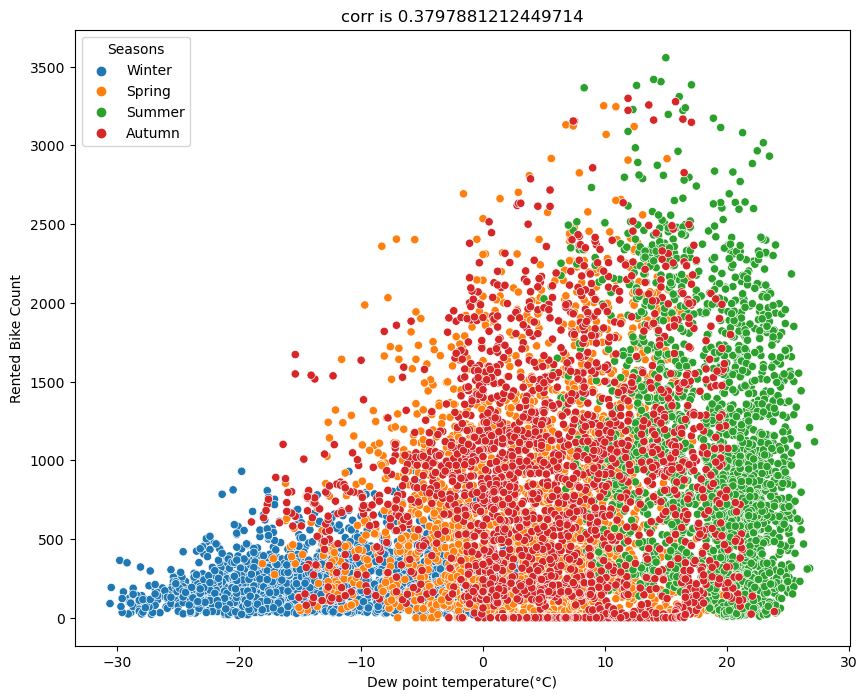

In [47]:
scatter_plt('Dew point temperature(°C)','Rented Bike Count')

##### 1. Why did you pick the specific chart?

to understand the impact of dew on buisness , it is clear from scatterplot that more bikes get rented when due point temperature is more 

#### Chart - 15 - Correlation Heatmap

<AxesSubplot:>

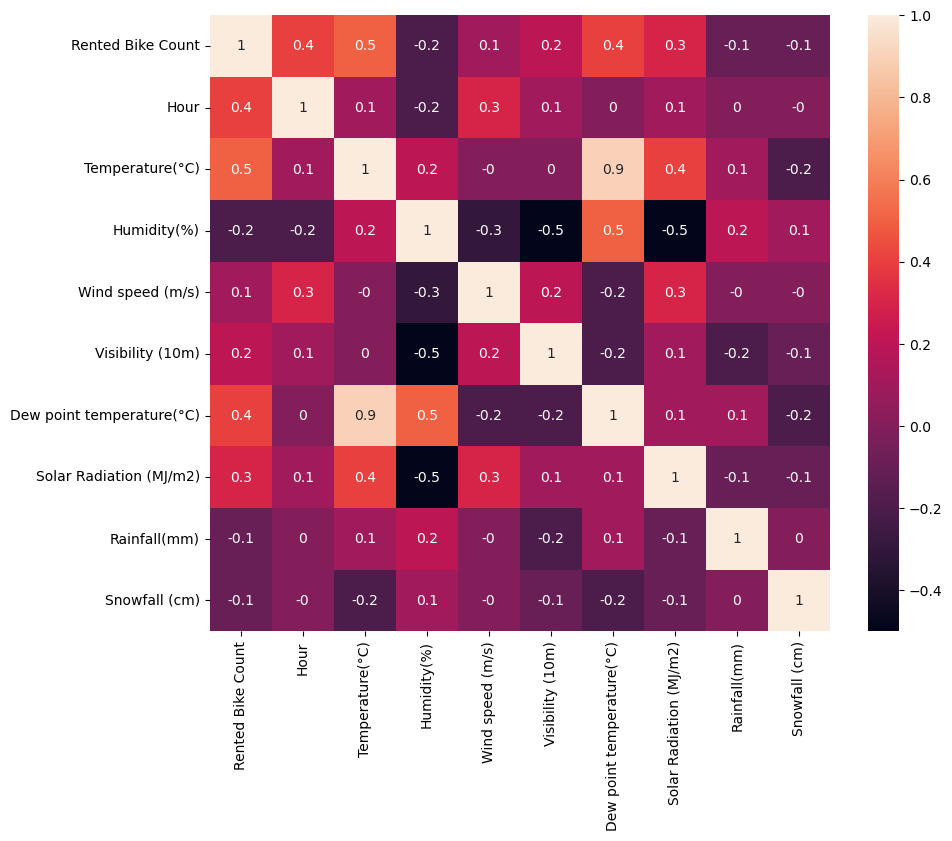

In [48]:
aa=df.corr()
fig=plt.figure(figsize=(10,8))
sns.heatmap(round(aa,1),annot=True)

##### 1. Why did you pick the specific chart?

to check the coorelation between other  feature and targeted feature

##### 2. What is/are the insight(s) found from the chart?

feature like "temperature" ,"hour" , "dew point temprature" and "solar radiation" has coorelation more than 0.2 with targeted column " rented bike count.

#### Chart - 15 - Pair Plot 

<Figure size 2000x1800 with 0 Axes>

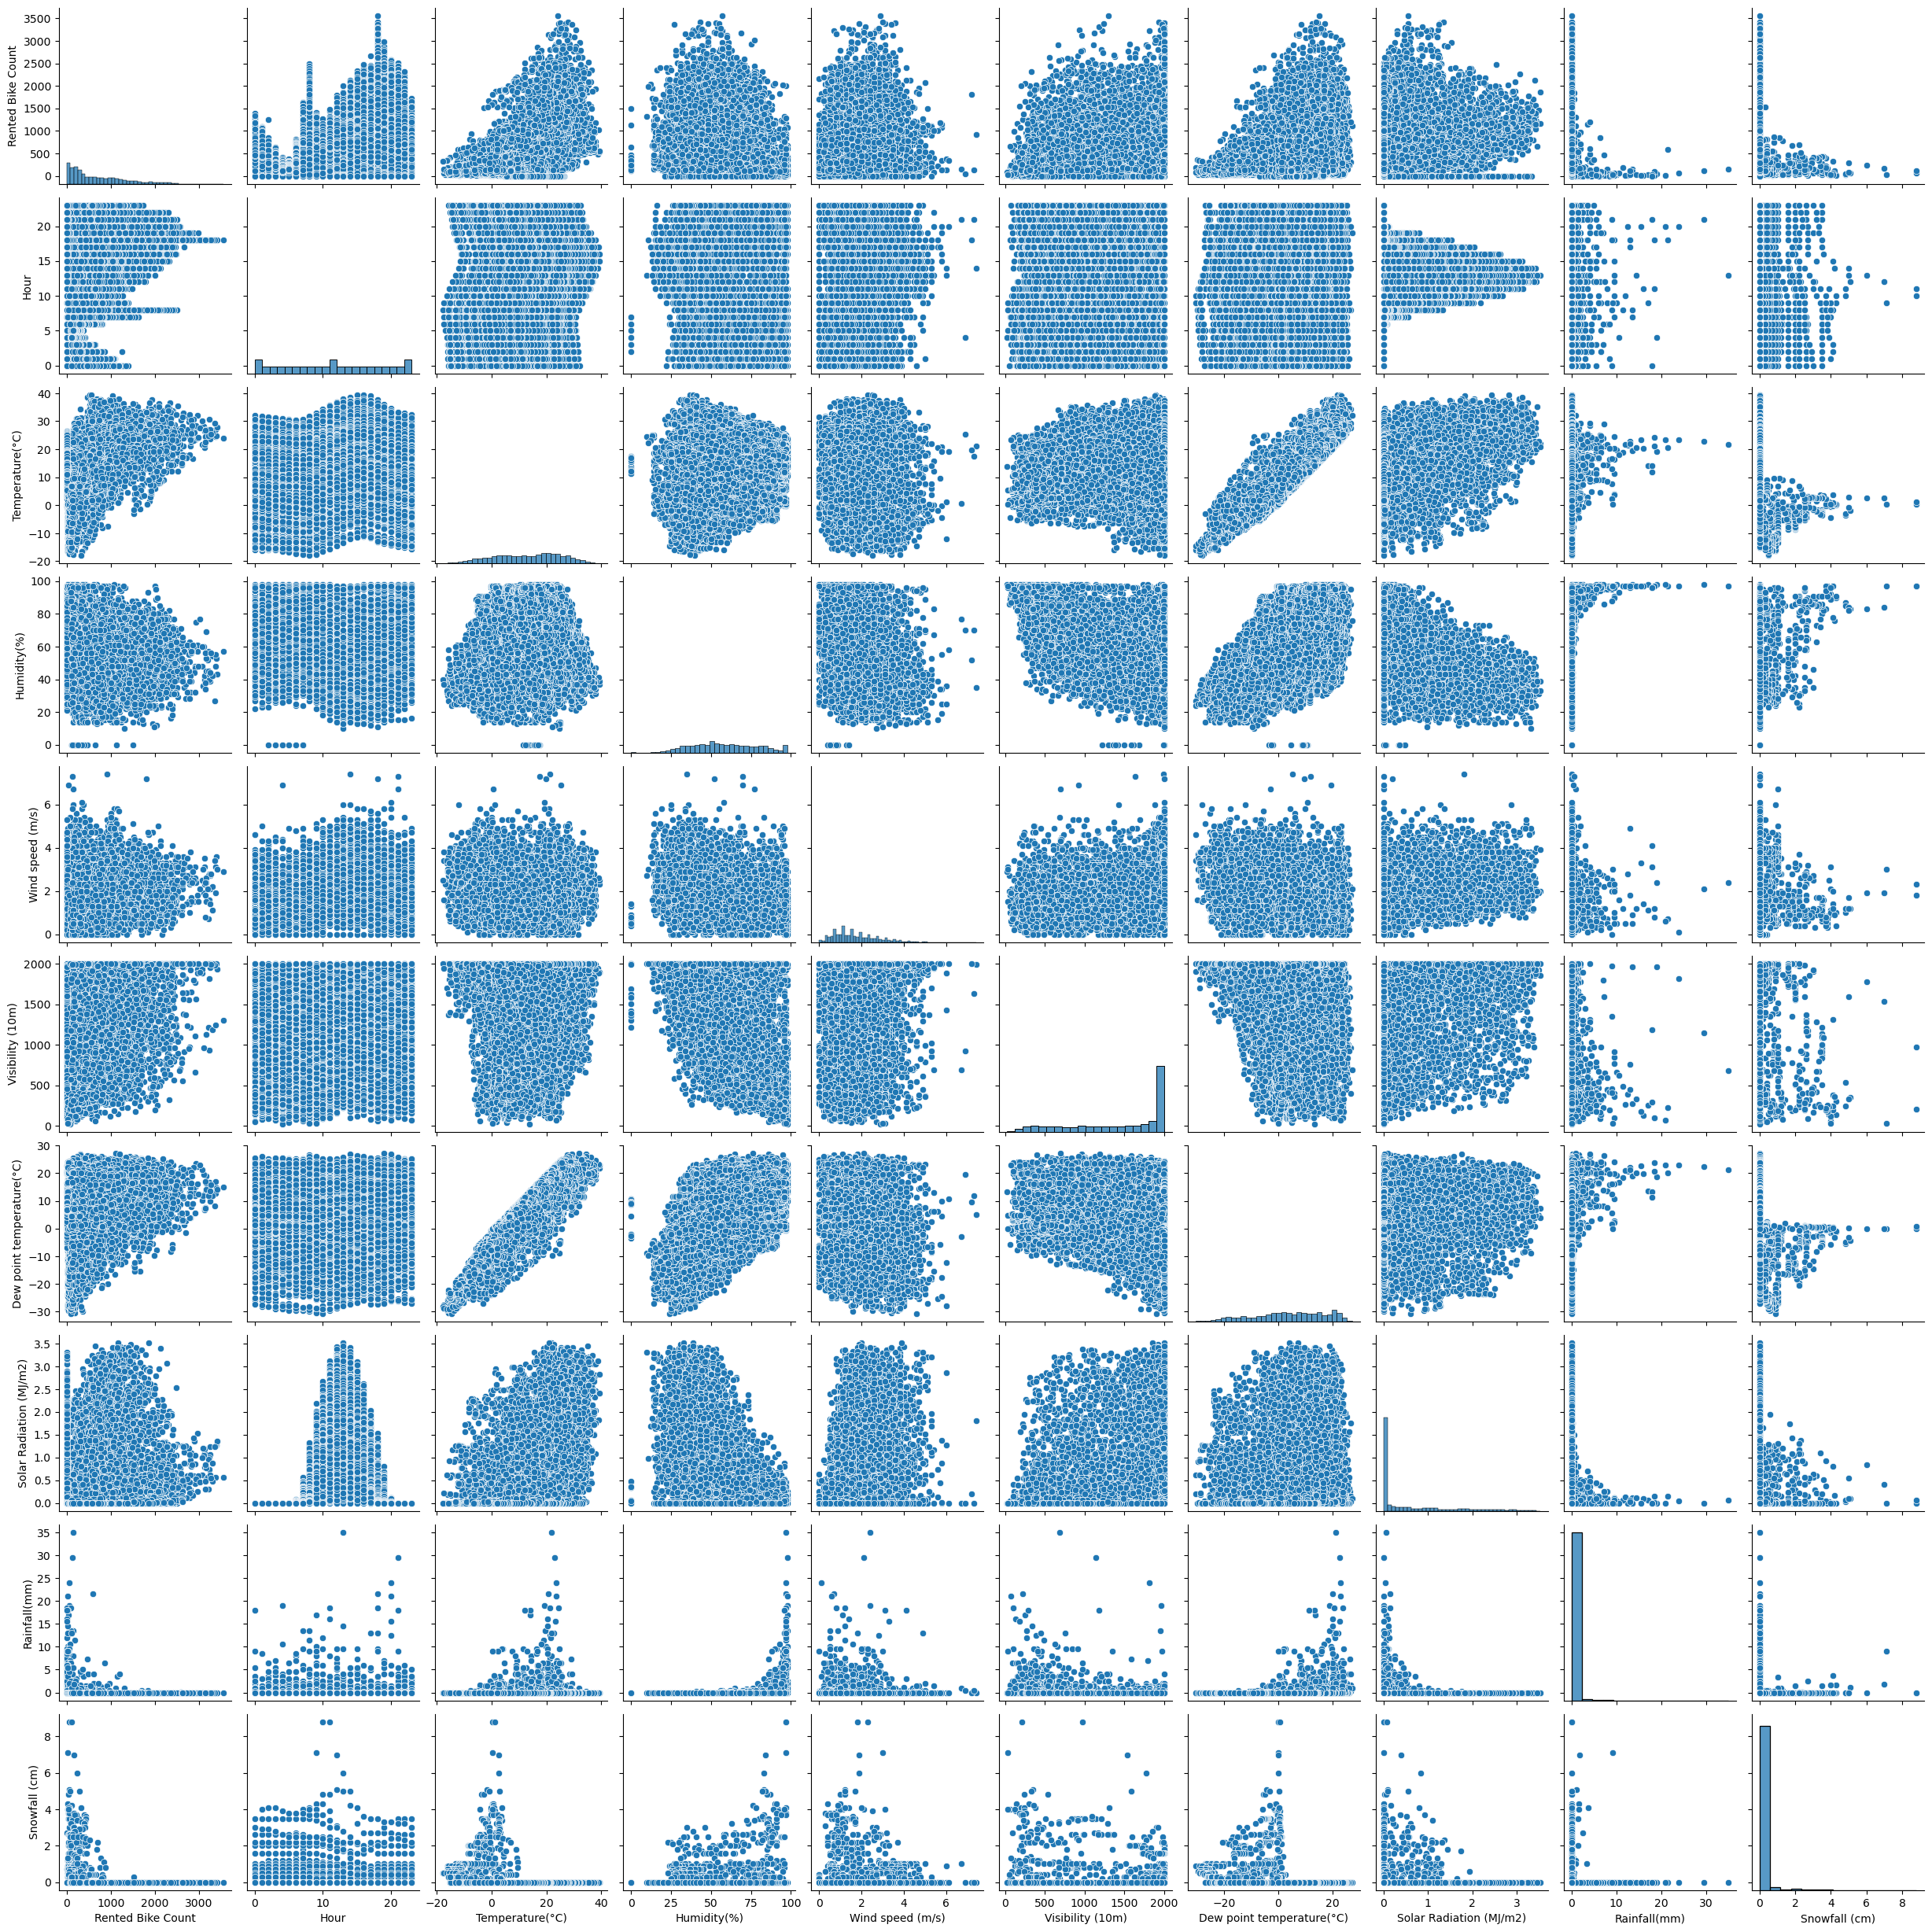

In [49]:
fig=plt.figure(figsize=(20,18))
sns.pairplot(df,markers=['o','s','d'])

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [50]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
days                         0
month                        0
time_slot                    0
dtype: int64

there are no missing values

#### What all missing value imputation techniques have you used and why did you use those techniques?

there are no missing values in the dataset.

### 2. Handling Outliers

In the context of the dataset at hand, which includes parameters such as 'Date,' 'Rented Bike Count,' 'Hour,' 'Temperature(°C),' 'Humidity(%),' 'Wind speed (m/s),' 'Visibility (10m),' 
'Dew point temperature(°C),' 'Solar Radiation (MJ/m2),' 'Rainfall(mm),' 'Snowfall (cm),'
'Seasons,' 'Holiday,' 'Functioning Day,' 'days,' 'month,' and 'time_slot,' 
it is worth noting that these variables predominantly represent natural parameters or temporal attributes.
Given the nature of this dataset, which deals with aspects like weather conditions, time-related factors, and 
seasonal variations, there may be limited necessity to extensively handle outliers in this context. 
Outliers in natural parameters could indeed carry meaningful information,
reflecting exceptional weather events or atypical temporal patterns, which can be valuable for certain analyses,
such as weather forecasting or demand prediction for bike rentals. 
Therefore, the decision to address outliers should be made judiciously, taking into consideration the specific objectives and 
domain knowledge relevant to the dataset.

### 3. Categorical Encoding

In [51]:
def uniq_cat(dataframe):

    r={}
    for i in df.dtypes[df.dtypes=='object'].index.tolist():
       
        r[i]=df[i].unique().tolist()
    return (r)        
        

In [52]:
uniq_cat(df) # unique values od all categorical columns 

{'Seasons': ['Winter', 'Spring', 'Summer', 'Autumn'],
 'Holiday': ['No Holiday', 'Holiday'],
 'Functioning Day': ['Yes', 'No'],
 'days': ['Thursday',
  'Sunday',
  'Wednesday',
  'Friday',
  'Monday',
  'Saturday',
  'Tuesday'],
 'month': ['January',
  'February',
  'March',
  'April',
  'May',
  'June',
  'July',
  'August',
  'September',
  'October',
  'November',
  'December'],
 'time_slot': ['early morning[0-6]',
  'morning[6-12]',
  'afternoon[12-16]',
  'evening[16-21]',
  'night[21-24]']}

In [53]:
df['month']=df.Date.dt.month # encoding name of months to their respective number
df['days']=df.Date.dt.weekday # encoding weekdays into respective number

In [54]:
transformer=ColumnTransformer(transformers=[('tnf1',OneHotEncoder(drop='first'),['Seasons','Holiday','Functioning Day'])],
                              remainder='passthrough'
)

#### What all categorical encoding techniques have you used & why did you use those techniques?

1. i encoded month column with help of ".dt.month" method
2. i encoded days column with help of ".dt.weekday" , which will give unque values to each category in column.
3. i used column transformer to encode "seasons,holiday and functioning day"

In [55]:
# checkin relationship between numerical features and targeted column
def linear_rela(a,b):
    cor=df.corr()
    fig=plt.figure(figsize=(10,8))
    ax=sns.regplot(x=df[a],y=df[b],order=3,scatter=False)
    ax.set_title(f"corr is {cor.loc[a,b]}")
    plt.show()

In [56]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'days', 'month', 'time_slot'],
      dtype='object')

### 4. Feature Manipulation & Selection

#### 1. Feature  Selection

In [57]:
num_df=df[df.describe().columns]

In [58]:
# Select your features wisely to avoid overfitting
vif=variance_inflation_factor
vif_df=pd.DataFrame([[i,variance_inflation_factor(num_df,num_df.columns.get_loc(i))] for i in df.describe().columns],columns=['col_name','vif'])
vif_df

col_name        vif
0           Rented Bike Count   4.152389
1                        Hour   5.045216
2             Temperature(°C)  38.070980
3                 Humidity(%)   8.027418
4            Wind speed (m/s)   4.839346
5            Visibility (10m)   9.330922
6   Dew point temperature(°C)  18.548163
7     Solar Radiation (MJ/m2)   2.915018
8                Rainfall(mm)   1.105274
9               Snowfall (cm)   1.126721
10                       days   3.307998
11                      month   4.712065

 two columns (temperature and dew point temperature) has very high vif , so to avoid multi colinearity , we need to drop one column having more vif.

In [59]:
df.drop('Temperature(°C)',axis=1,inplace=True)

In [60]:
num_df=df[df.describe().columns]

In [61]:
vif=variance_inflation_factor
vif_df=pd.DataFrame([[i,variance_inflation_factor(num_df,num_df.columns.get_loc(i))] for i in df.describe().columns],columns=['col_name','vif'])
vif_df

col_name       vif
0           Rented Bike Count  3.835279
1                        Hour  4.817896
2                 Humidity(%)  7.748036
3            Wind speed (m/s)  4.759373
4            Visibility (10m)  6.125890
5   Dew point temperature(°C)  2.189965
6     Solar Radiation (MJ/m2)  1.971546
7                Rainfall(mm)  1.105174
8               Snowfall (cm)  1.117459
9                        days  3.201445
10                      month  4.652871

In [62]:
df.head()

Date  Rented Bike Count  Hour  Humidity(%)  Wind speed (m/s)  \
0 2017-01-12                254     0           37               2.2   
1 2017-01-12                204     1           38               0.8   
2 2017-01-12                173     2           39               1.0   
3 2017-01-12                107     3           40               0.9   
4 2017-01-12                 78     4           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  days  \
0           0.0            0.0  Winter  No Holiday             Yes     3   
1           0.0            0.0  Winter  No Holiday             Yes     3   
2           0.0            0.0  Winter  No Holiday             Yes     3   
3           0.0            0.0  Winter  No Holiday             Yes     3   
4           0.0            0.0  Winter  No Holiday             Yes     3   

   month           time_slot  
0      1  early morning[0-6]  
1      1  early morning[0-6]  
2      1  early morning[0-6]  
3      1  early morning[0-6]  
4      1  early morning[0-6]

there are some columns in our dataset , which we dont need like ("Date","Timeslots")

In [63]:
df.drop(['Date','time_slot'],axis=1,inplace=True) # dropping date and time_slot column

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [64]:
def skew(df):    
    fig=plt.figure(figsize=(10,10))
    for i in df.describe().columns:
        ax=plt.gca()
        f=df[i]
        bb=sns.kdeplot(df[i])
        bb=sns.distplot(df[i])
        ax.axvline(df[i].mean())
        ax.axvline(df[i].median(),color='red')
        bb.set_title(f"skewness is {df[i].skew()}")
    
        plt.show()


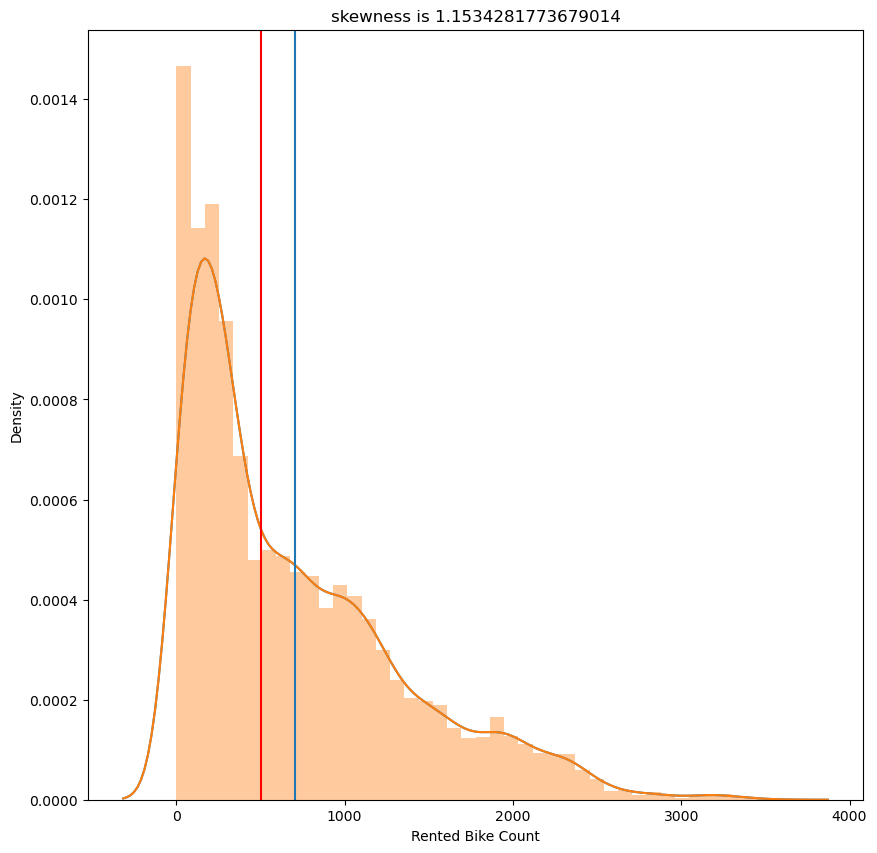

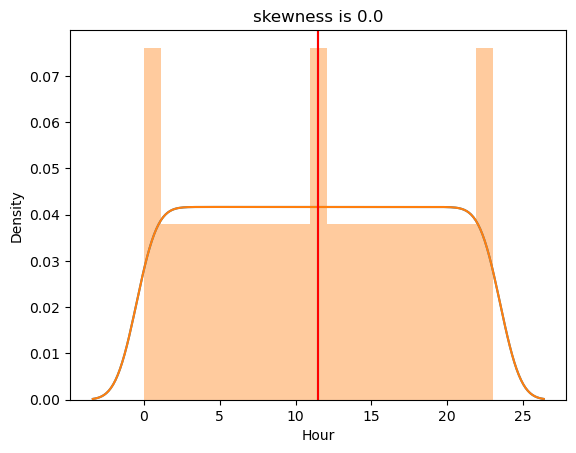

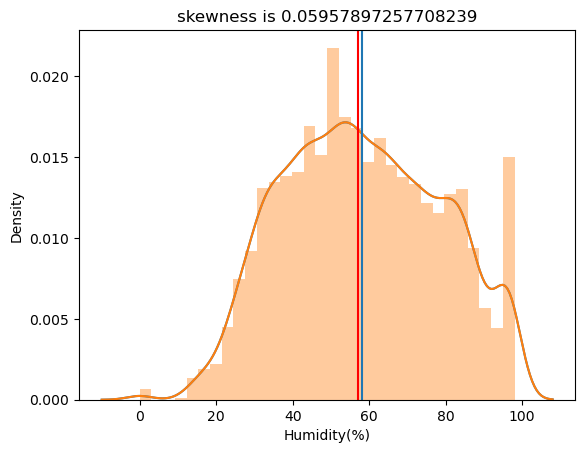

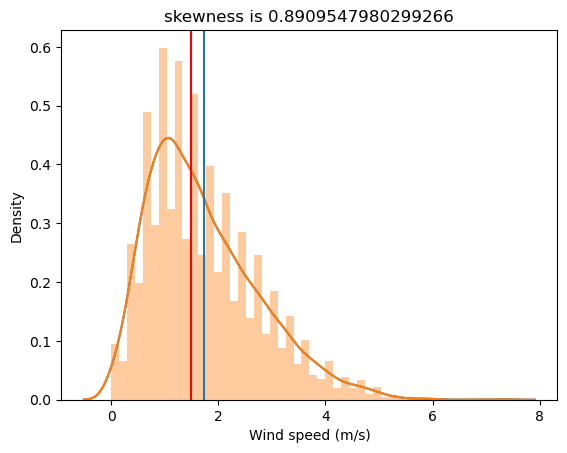

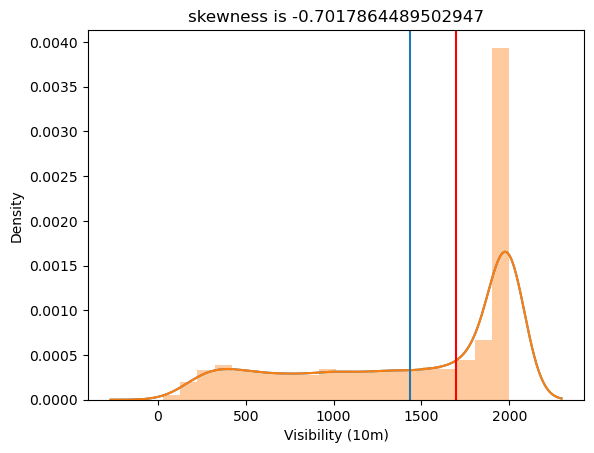

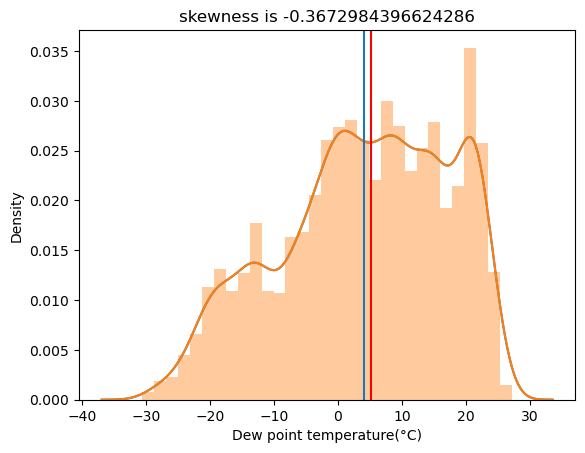

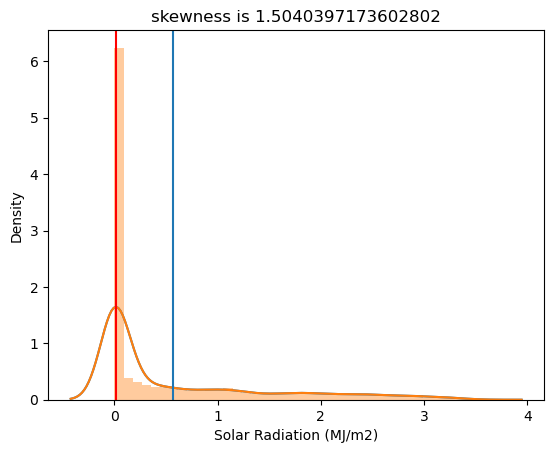

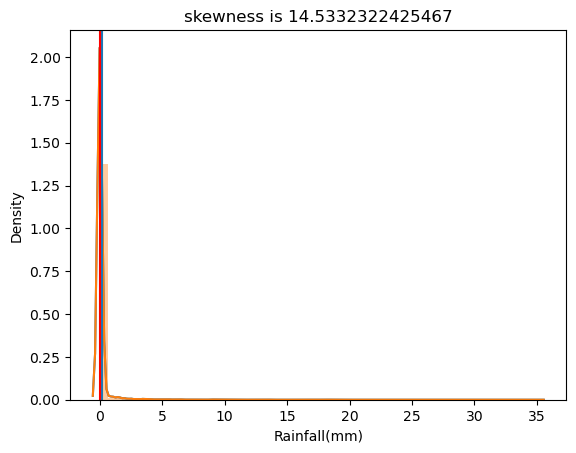

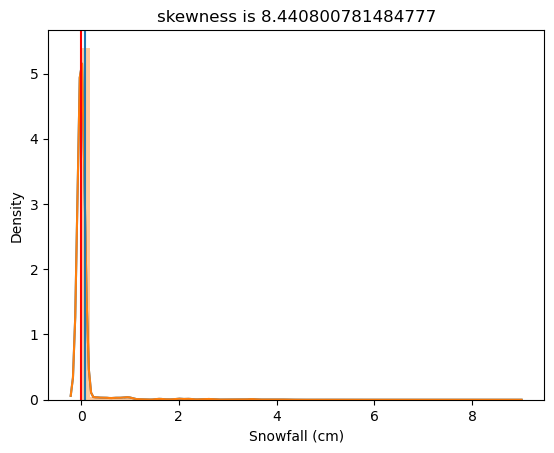

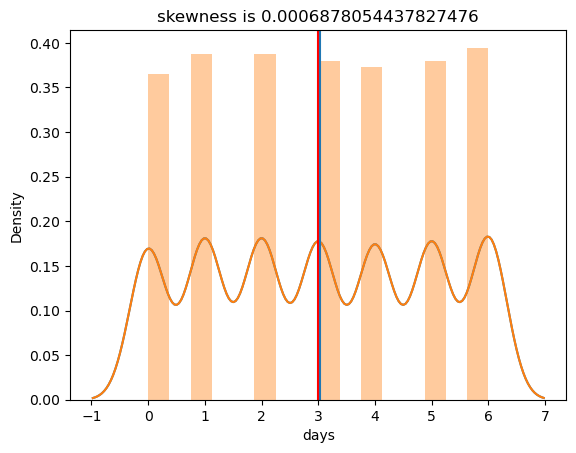

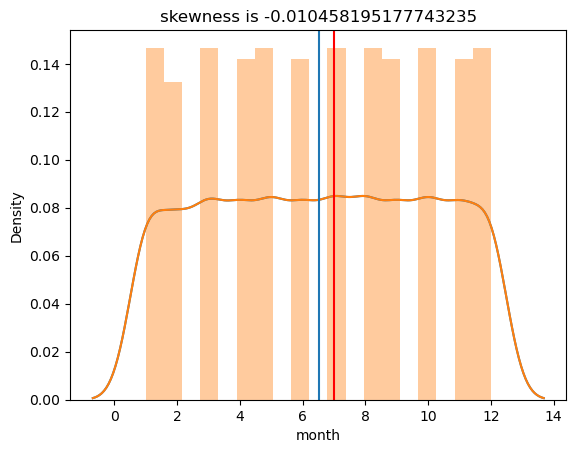

In [65]:
skew(df)

from above visualisations , we can say that there are some features  which are righlty and leftly skewed 

In [66]:
def skewness(df):   
    skew_table=pd.DataFrame([[i,df[i].skew()] for i in df.describe().columns],columns=['feature','skewness'])
    return skew_table

In [67]:
skewness(df)

feature   skewness
0           Rented Bike Count   1.153428
1                        Hour   0.000000
2                 Humidity(%)   0.059579
3            Wind speed (m/s)   0.890955
4            Visibility (10m)  -0.701786
5   Dew point temperature(°C)  -0.367298
6     Solar Radiation (MJ/m2)   1.504040
7                Rainfall(mm)  14.533232
8               Snowfall (cm)   8.440801
9                        days   0.000688
10                      month  -0.010458

In [68]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'days', 'month'],
      dtype='object')

In [69]:
def log_trnsf(df):
    for i in df.describe().columns :
        if i not in ['Dew point temperature(°C)']:
            if df[i].skew()>=0.1 or df[i].skew()<=-0.1 :
                df[i]=np.log1p(df[i])
        else:
            continue
    return df        

In [70]:
log_trnsf(df)

Rented Bike Count  Hour  Humidity(%)  Wind speed (m/s)  \
0              5.541264     0           37          1.163151   
1              5.323010     1           38          0.587787   
2              5.159055     2           39          0.693147   
3              4.682131     3           40          0.641854   
4              4.369448     4           36          1.193922   
...                 ...   ...          ...               ...   
8755           6.911747    19           34          1.280934   
8756           6.639876    20           37          1.193922   
8757           6.543912    21           39          0.262364   
8758           6.569481    22           41          0.693147   
8759           6.371612    23           43          0.832909   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0             7.601402                      -17.6                      0.0   
1             7.601402                      -17.6                      0.0   
2             7.601402                      -17.7                      0.0   
3             7.601402                      -17.6                      0.0   
4             7.601402                      -18.6                      0.0   
...                ...                        ...                      ...   
8755          7.546974                      -10.3                      0.0   
8756          7.601402                       -9.9                      0.0   
8757          7.585281                       -9.9                      0.0   
8758          7.528332                       -9.8                      0.0   
8759          7.554859                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  days  \
0              0.0            0.0  Winter  No Holiday             Yes     3   
1              0.0            0.0  Winter  No Holiday             Yes     3   
2              0.0            0.0  Winter  No Holiday             Yes     3   
3              0.0            0.0  Winter  No Holiday             Yes     3   
4              0.0            0.0  Winter  No Holiday             Yes     3   
...            ...            ...     ...         ...             ...   ...   
8755           0.0            0.0  Autumn  No Holiday             Yes     4   
8756           0.0            0.0  Autumn  No Holiday             Yes     4   
8757           0.0            0.0  Autumn  No Holiday             Yes     4   
8758           0.0            0.0  Autumn  No Holiday             Yes     4   
8759           0.0            0.0  Autumn  No Holiday             Yes     4   

      month  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
8755     11  
8756     11  
8757     11  
8758     11  
8759     11  

[8760 rows x 14 columns]

In [71]:
df.shape

(8760, 14)

## After transformation

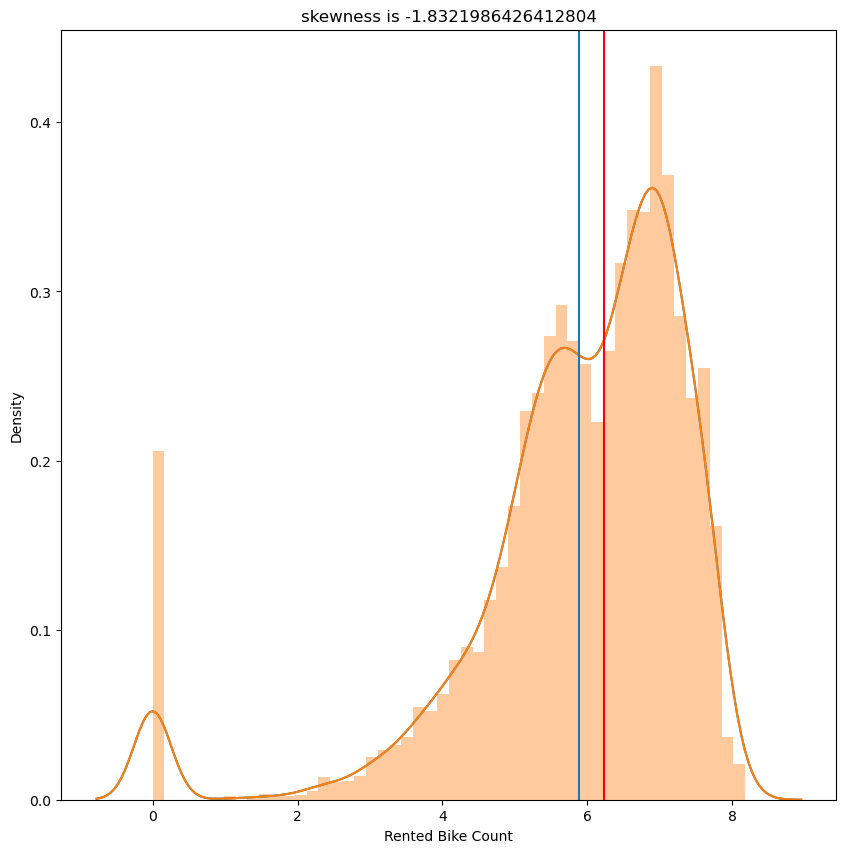

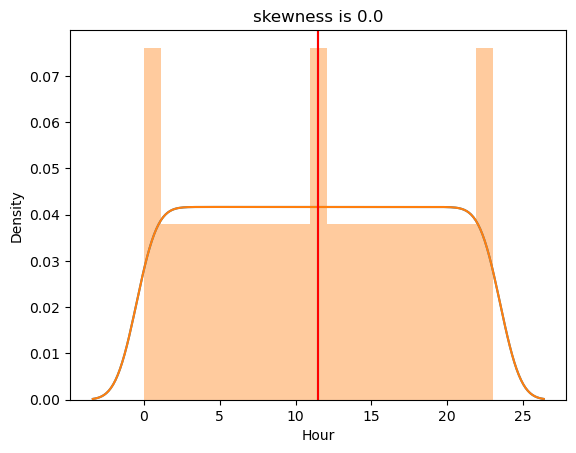

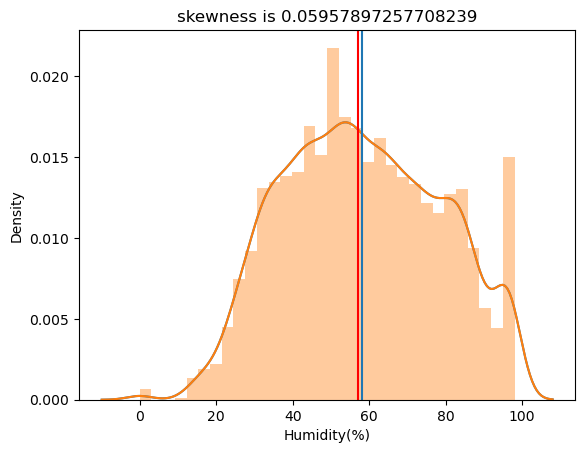

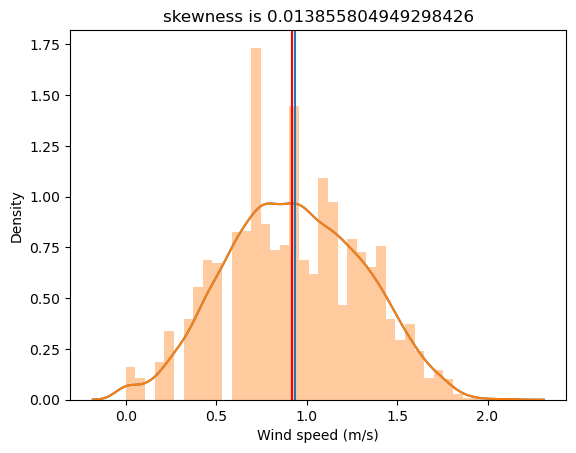

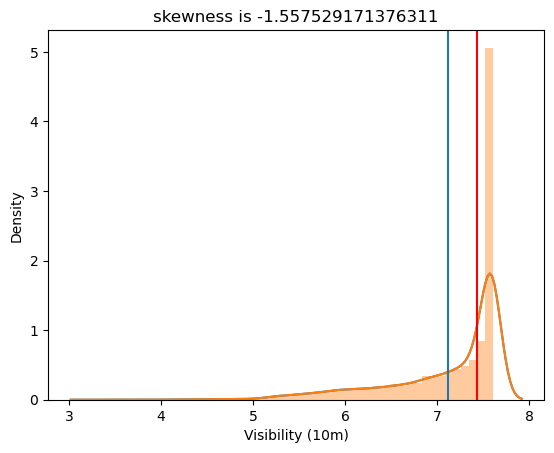

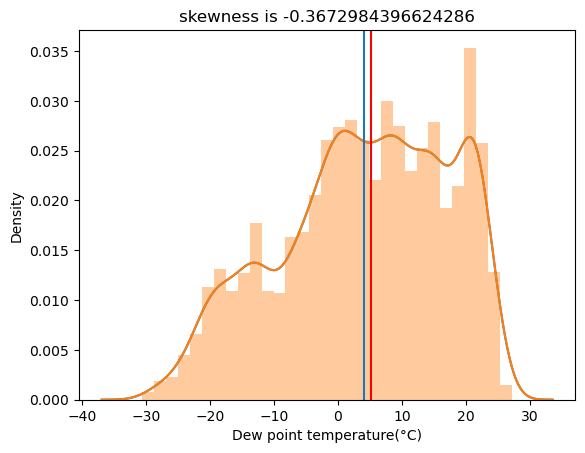

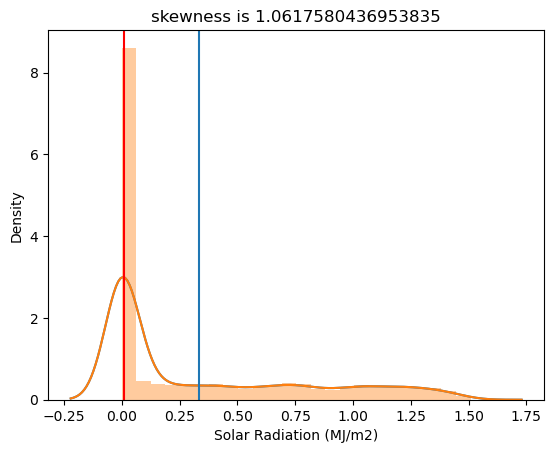

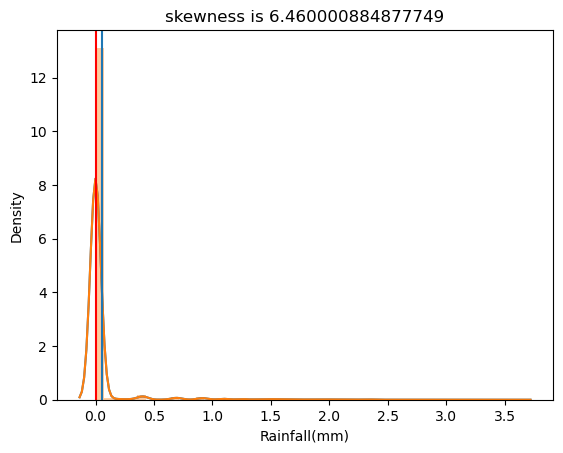

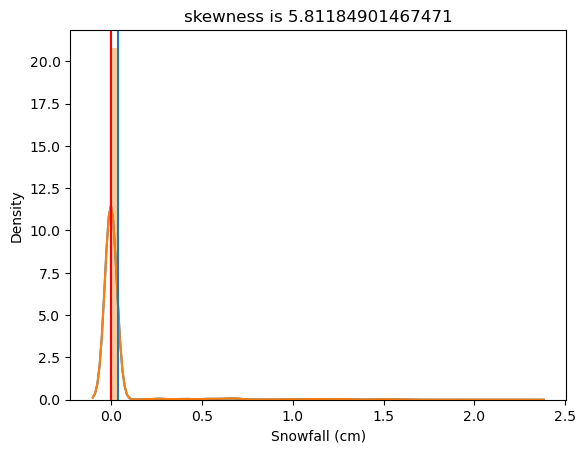

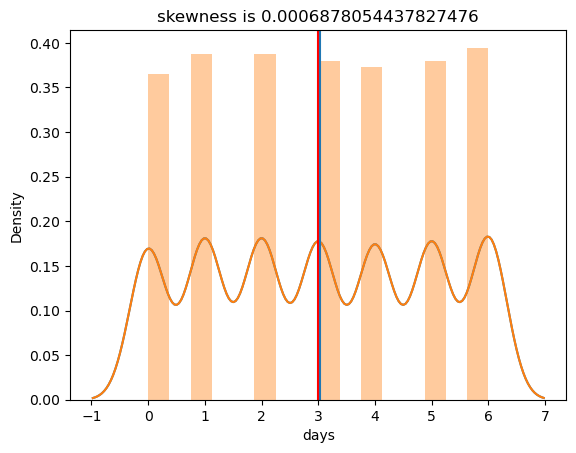

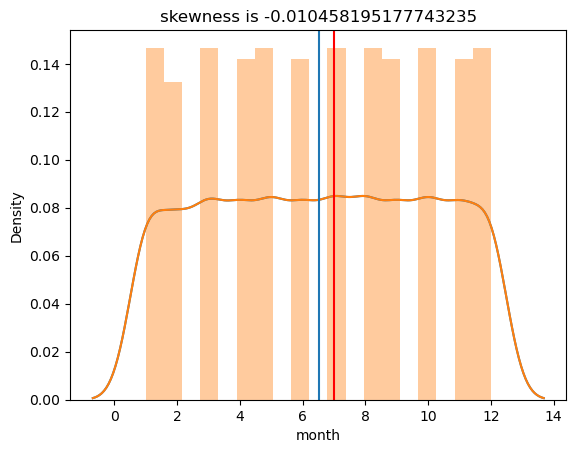

In [72]:
skew(df)

# from above visualisations , we can say that , difference between mean and median line has reduced to some extent , which means skewness has also reduced
.

### 6. Data Scaling

In [73]:
x=[i for i in df.columns if i not in ['Rented Bike Count']]
x=df[x]
y=df['Rented Bike Count']

In [74]:
x=transformer.fit_transform(x)

In [75]:
df.shape

(8760, 14)

In [76]:
df[df['Functioning Day']=='No']

Rented Bike Count  Hour  Humidity(%)  Wind speed (m/s)  \
3144                0.0     0           82          1.722767   
3145                0.0     1           81          1.526056   
3146                0.0     2           80          1.589235   
3147                0.0     3           81          1.410987   
3148                0.0     4           83          1.504077   
...                 ...   ...          ...               ...   
8251                0.0    19           71          1.308333   
8252                0.0    20           72          1.252763   
8253                0.0    21           74          1.064711   
8254                0.0    22           75          0.993252   
8255                0.0    23           76          0.788457   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
3144          6.948897                       11.3                      0.0   
3145          6.787845                       10.3                      0.0   
3146          6.786717                        9.3                      0.0   
3147          6.533789                        8.4                      0.0   
3148          6.318968                        7.4                      0.0   
...                ...                        ...                      ...   
8251          6.380123                        6.7                      0.0   
8252          6.267201                        7.0                      0.0   
8253          6.212606                        6.9                      0.0   
8254          6.171701                        6.9                      0.0   
8255          6.124683                        6.8                      0.0   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  days  \
3144           0.0            0.0  Spring  No Holiday              No     6   
3145           0.0            0.0  Spring  No Holiday              No     6   
3146           0.0            0.0  Spring  No Holiday              No     6   
3147           0.0            0.0  Spring  No Holiday              No     6   
3148           0.0            0.0  Spring  No Holiday              No     6   
...            ...            ...     ...         ...             ...   ...   
8251           0.0            0.0  Autumn  No Holiday              No     1   
8252           0.0            0.0  Autumn  No Holiday              No     1   
8253           0.0            0.0  Autumn  No Holiday              No     1   
8254           0.0            0.0  Autumn  No Holiday              No     1   
8255           0.0            0.0  Autumn  No Holiday              No     1   

      month  
3144     11  
3145     11  
3146     11  
3147     11  
3148     11  
...     ...  
8251      9  
8252      9  
8253      9  
8254      9  
8255      9  

[295 rows x 14 columns]

In [77]:
ss=StandardScaler()
x=ss.fit_transform(x)

In [78]:
x

array([[-0.58051386, -0.58051386,  1.74801475, ..., -0.2002506 ,
        -0.01095956, -1.60274527],
       [-0.58051386, -0.58051386,  1.74801475, ..., -0.2002506 ,
        -0.01095956, -1.60274527],
       [-0.58051386, -0.58051386,  1.74801475, ..., -0.2002506 ,
        -0.01095956, -1.60274527],
       ...,
       [-0.58051386, -0.58051386, -0.57207755, ..., -0.2002506 ,
         0.48907046,  1.29761181],
       [-0.58051386, -0.58051386, -0.57207755, ..., -0.2002506 ,
         0.48907046,  1.29761181],
       [-0.58051386, -0.58051386, -0.57207755, ..., -0.2002506 ,
         0.48907046,  1.29761181]])

### . Data Splitting

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [80]:
x_train

array([[-0.58051386,  1.72261177, -0.57207755, ..., -0.2002506 ,
        -0.51098959, -1.31270956],
       [-0.58051386,  1.72261177, -0.57207755, ..., -0.2002506 ,
        -1.01101962,  0.42750469],
       [-0.58051386, -0.58051386, -0.57207755, ..., -0.2002506 ,
        -0.51098959, -0.44260244],
       ...,
       [-0.58051386, -0.58051386,  1.74801475, ..., -0.2002506 ,
         1.48913052,  0.13746898],
       [-0.58051386,  1.72261177, -0.57207755, ..., -0.2002506 ,
        -1.51104964, -0.44260244],
       [-0.58051386, -0.58051386,  1.74801475, ..., -0.2002506 ,
        -0.01095956,  1.0075761 ]])

## ***7. ML Model Implementation***

### ML Model - 1

In [172]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [240]:
def reg_metri(y_pred,y_test,x):


    print('-'*50)
    mae=mean_absolute_error(y_pred,y_test)
    print(f"mean absolute error is {mae}")
    print('-'*50)
    mse=mean_squared_error(y_pred,y_test)
    print(f"mean squared error is {mse}")
    print('-'*50)
    n,p=len(y_test),x.shape[1]
    r2_sc=r2_score(y_pred,y_test)
    print(f"r2 score is {r2_sc}")
    print('-'*50)
    
    
    adj_r2=1-((1-r2_sc)*(n-1)/(n-1-p))
    print(f"adjusted r2 is {adj_r2}")
    print('-'*50)
    

In [241]:
reg_metri(y_pred,y_test,x)

--------------------------------------------------
mean absolute error is 0.4934067293195229
--------------------------------------------------
mean squared error is 0.4407908202464497
--------------------------------------------------
r2 score is 0.7773084924768022
--------------------------------------------------
adjusted r2 is 0.7760296361931698
--------------------------------------------------


In [242]:
def eval_metric_chart(y_pred,y_test):
    plt.figure(figsize=(18,8))
    ax=sns.lineplot(data=y_pred[:200],label='Predicted',color='red')
    ax=sns.lineplot(data=np.array(y_test[:200]),label='Actual',color='blue')
    ax.set_title("Actual and Predicted ")
    plt.show()

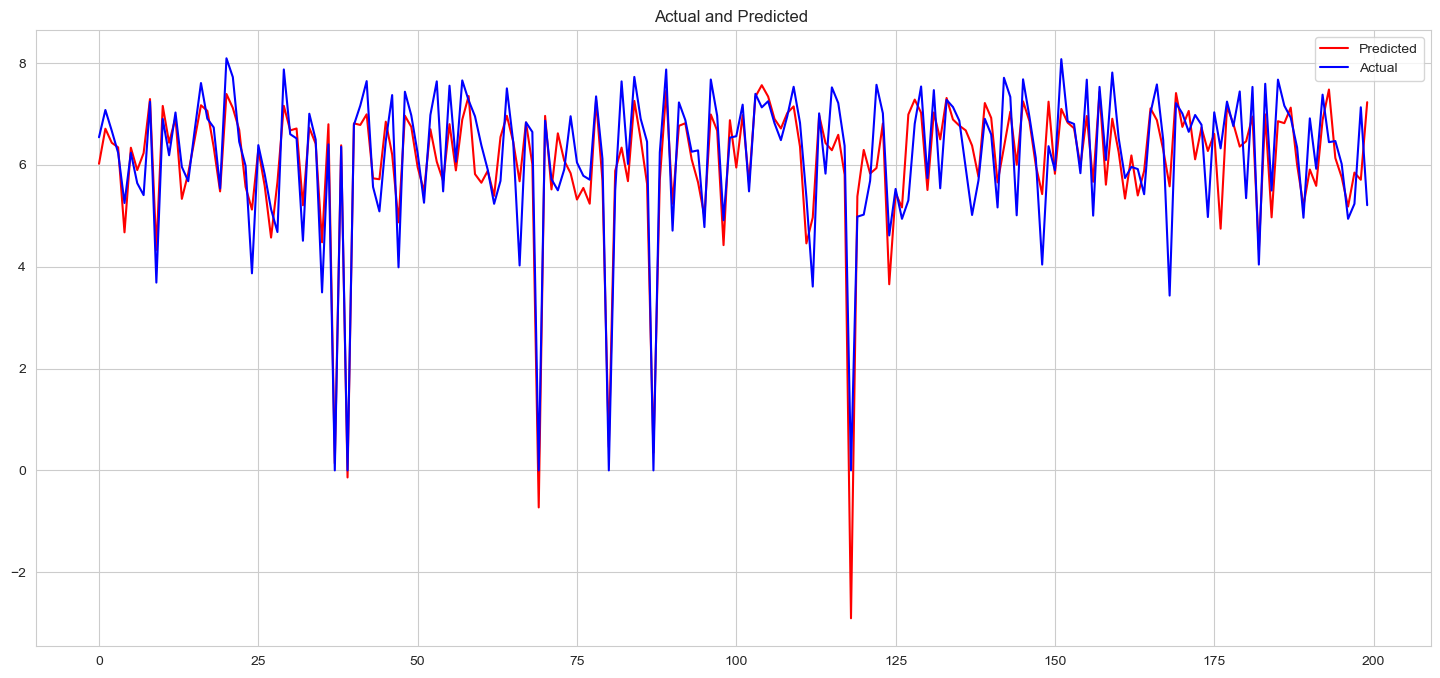

In [243]:
eval_metric_chart(y_pred,y_test)

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [248]:
lasso1=LassoCV(alphas=None,cv=35,max_iter=1500,normalize=True)
lasso1.fit(x_train,y_train)
alph=lasso1.alpha_

In [255]:
lasso=Lasso(alpha=alph)
lasso.fit(x_train,y_train)
print(f"inter cept is{lasso.intercept_}")
print(f"coefficients are{lasso.coef_}")


5.884668764065325
coefficients are[-0.10662887 -0.10688924 -0.32867572  0.0695853   1.16780332  0.30378537
 -0.45371442 -0.01470831  0.01734744  0.55287039  0.03186978 -0.37078642
 -0.01402328 -0.01713569  0.03475361]


In [256]:
y_pred_l1=lasso.predict(x_test)
reg_metri(y_pred_l1,y_test,x)

--------------------------------------------------
mean absolute error is 0.4934104653048649
--------------------------------------------------
mean squared error is 0.4407922686808066
--------------------------------------------------
r2 score is 0.7772966742494899
--------------------------------------------------
adjusted r2 is 0.7760177500970176
--------------------------------------------------


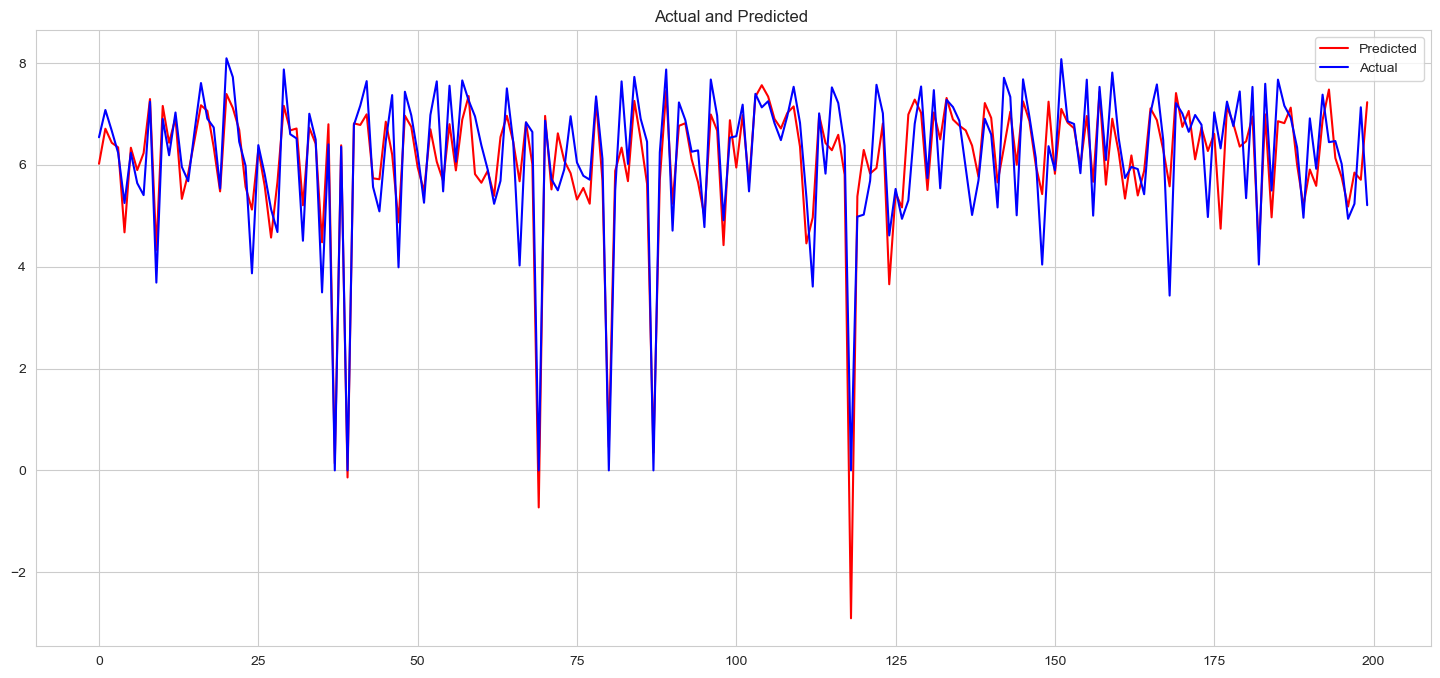

In [257]:
eval_metric_chart(y_pred_l1,y_test)

### ML Model - 3

In [262]:
ridge1=RidgeCV(alphas=np.random.uniform(0.1,0.2,1000),cv=25,normalize=True,)
ridge1.fit(x_train,y_train)
alph_l2=ridge1.alpha_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [264]:
ridge=Ridge(alpha=alph_l2)
ridge.fit(x_train,y_train)
print(f"coefficients are{ridge.coef_}")
print(f"intercept is {ridge.intercept_}")

coefficients are[-0.10665674 -0.10693985 -0.32867539  0.0696016   1.16780778  0.30379592
 -0.45371144 -0.01473003  0.01736328  0.55290054  0.03189238 -0.37079058
 -0.01403741 -0.0171514   0.03475867]
intercept is 5.884668623566847


In [266]:
y_pred_l2=ridge.predict(x_test)
reg_metri(y_pred_l2,y_test,x)

--------------------------------------------------
mean absolute error is 0.49340935838032085
--------------------------------------------------
mean squared error is 0.44079140095770464
--------------------------------------------------
r2 score is 0.7773003986825705
--------------------------------------------------
adjusted r2 is 0.7760214959184965
--------------------------------------------------


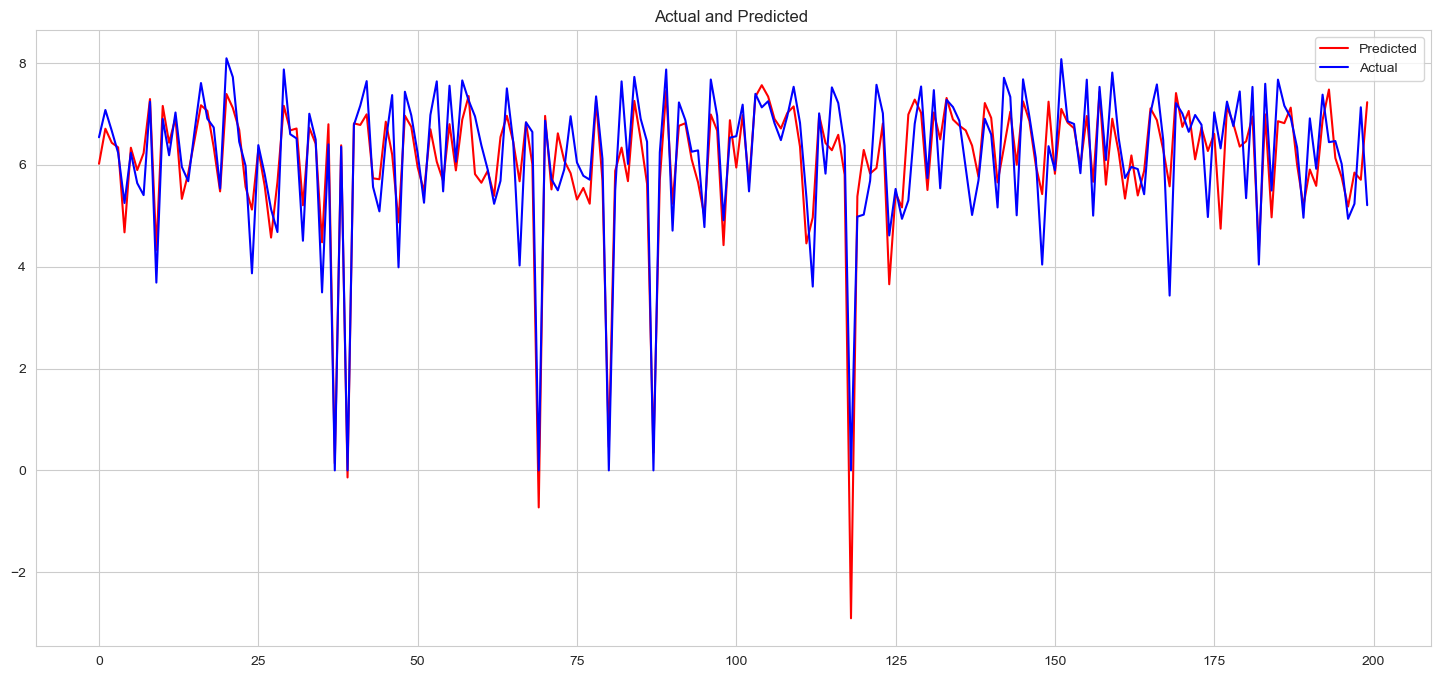

In [267]:
eval_metric_chart(y_pred_l2,y_test)

### ML Model - 4

In [272]:
elastic1=ElasticNetCV(normalize=True,cv=25)
elastic1.fit(x_train,y_train)
alph_e=elastic1.alpha_

In [273]:
elastic=ElasticNet(alpha=alph_e)
elastic.fit(x_train,y_train)
print(f"coefficients are{elastic.coef_}")
print(f"intercept is {elastic.intercept_}")


coefficients are[-0.10661888 -0.10685743 -0.32868345  0.06958305  1.16778234  0.30378884
 -0.45367011 -0.01470945  0.01735718  0.5528105   0.0318874  -0.37078467
 -0.01402821 -0.01713568  0.03475375]
intercept is 5.88466878111697


In [275]:
y_pred_el=elastic.predict(x_test)

In [276]:
reg_metri(y_pred_el,y_test,x)

--------------------------------------------------
mean absolute error is 0.49341272197832403
--------------------------------------------------
mean squared error is 0.44079277054200583
--------------------------------------------------
r2 score is 0.7772897242270485
--------------------------------------------------
adjusted r2 is 0.7760107601625024
--------------------------------------------------


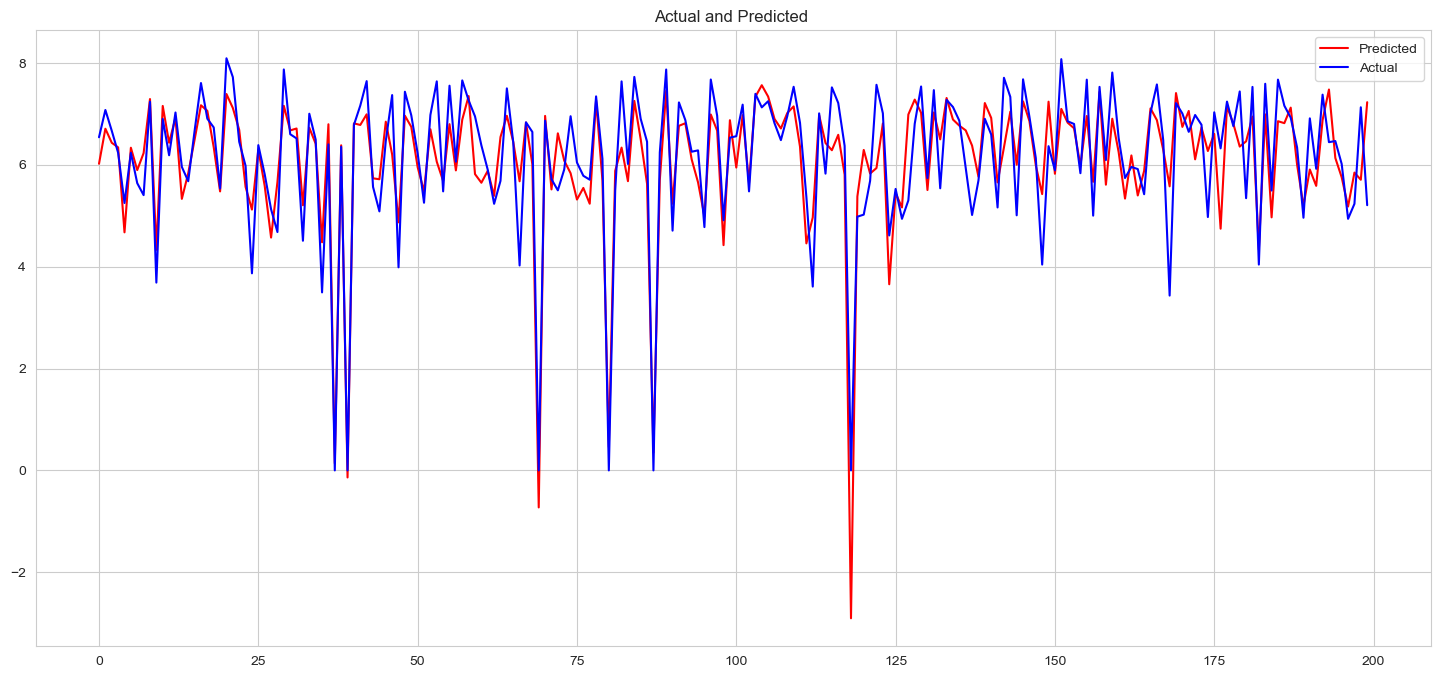

In [277]:
eval_metric_chart(y_pred_el,y_test)

### ML Model - 5

In [283]:

# ML Model - 3 Implementation

# Fit the Algorithm
from xgboost import XGBRegressor
xg=XGBRegressor()
xg=xg.fit(x_train,y_train)
# Predict on the model
y_pred_xg=xg.predict(x_test)


In [284]:
reg_metri(y_pred_xg,y_test,x)

--------------------------------------------------
mean absolute error is 0.227901325651898
--------------------------------------------------
mean squared error is 0.14376184582725454
--------------------------------------------------
r2 score is 0.9383488632589613
--------------------------------------------------
adjusted r2 is 0.9379948176804331
--------------------------------------------------


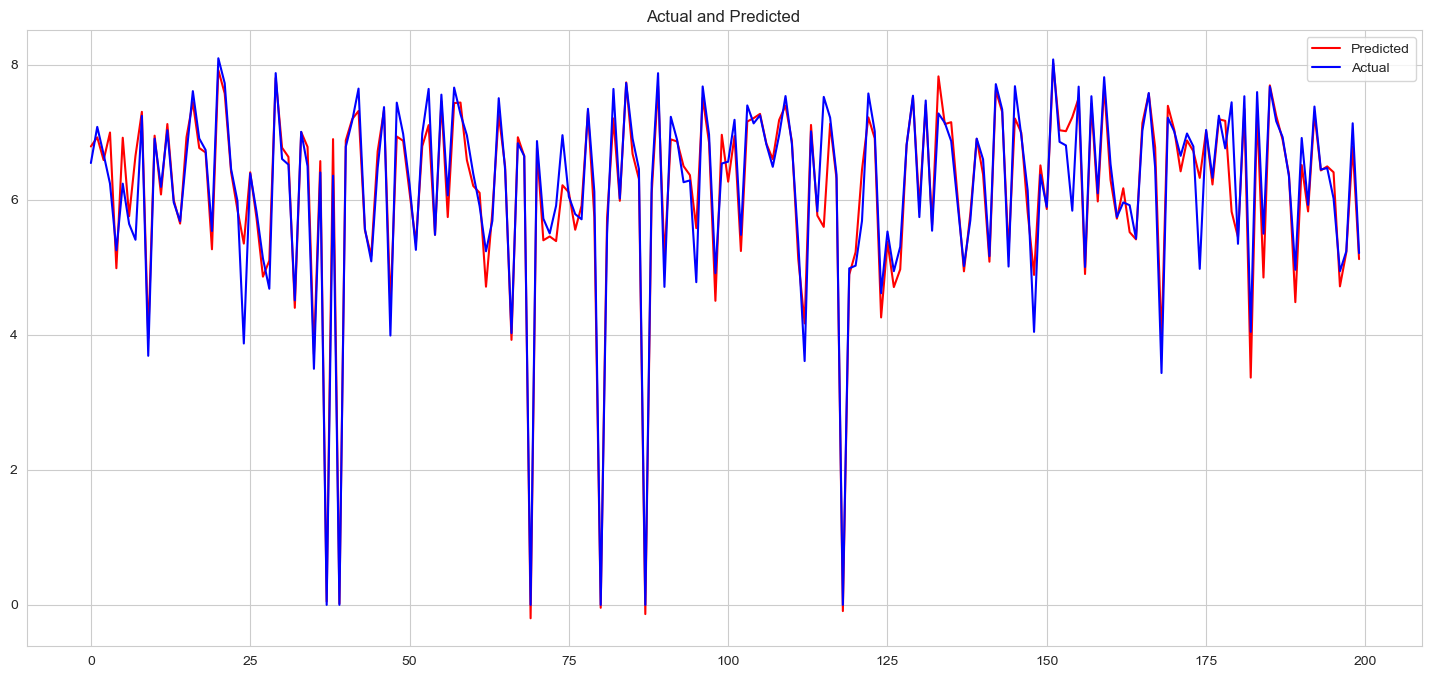

In [285]:
eval_metric_chart(y_pred_xg,y_test)

### ML Model - 6

In [286]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)


y_pred_dr=dr.predict(x_test)

In [287]:
reg_metri(y_pred_dr,y_test,x)

--------------------------------------------------
mean absolute error is 0.3223151905491746
--------------------------------------------------
mean squared error is 0.2751048535271779
--------------------------------------------------
r2 score is 0.8874622245660898
--------------------------------------------------
adjusted r2 is 0.8868159509705658
--------------------------------------------------


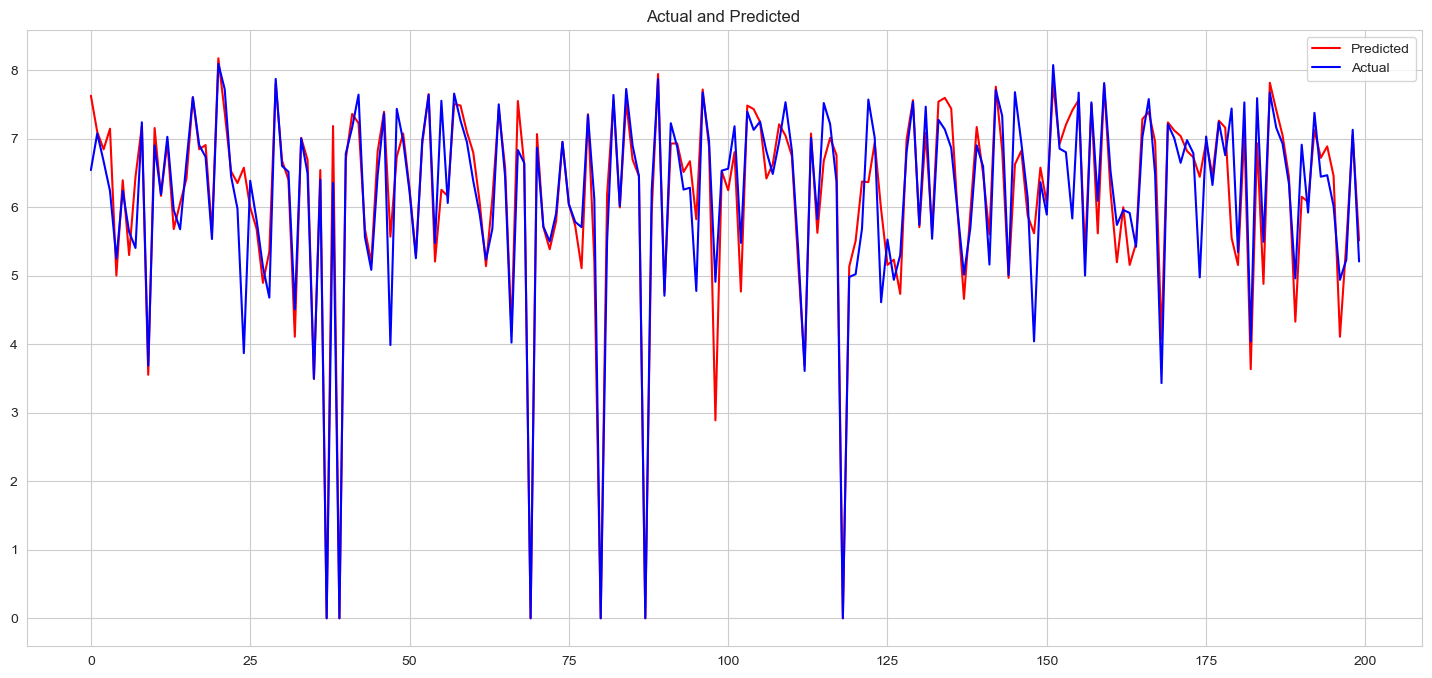

In [288]:
eval_metric_chart(y_pred_dr,y_test)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [290]:
import pickle
file='bike_pred_line.sav'
pickle.dump(xg,open(file,'wb'))


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [292]:
# Load the File and predict unseen data.
saved_model=pickle.load(open(file,'rb'))
saved_model.predict(x_test)

array([6.7892427, 6.923888 , 6.587244 , ..., 5.261803 , 7.194296 ,
       5.362392 ], dtype=float32)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.
• Thus customers do not like to rent a bike when it is too cold outside.

• More bikes are rented when there is no rainfall.

• More bikes are rented when there is no snowfall.

• More bikes are rented when there is less humidity.

• Highest number of bikes is rented in Summer and the lowest in winter.

• The highest number of bikes are rented in Thursday and the lowest on Sunday.

• The highest number of bikes are rented in June and the lowest in February.

• Most of the bikes are rented when there is no holiday.

• All the bikes are rented on functioning days.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***